In [107]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, average_precision_score,precision_recall_curve
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import shap
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
import functions
import joblib

In [2]:
pip install fairlearn==0.12.0

In [3]:
import pandas as pd

# Update the path based on where you have the file in your Google Drive
df = pd.read_csv("D:/Swinburne/Sem 4/Technology Application Project/default/CLient_Data.csv")
# Display the first few rows
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [4]:
import pandas as pd

# Update the path based on where you have the file in your Google Drive
df = pd.read_csv("../Client_Data.csv")
# Display the first few rows
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

# 1. Preprocessing

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# Check for Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [9]:
# Check for Duplicates
print("\nDuplicate Rows Count:")
print(df.duplicated().sum())


Duplicate Rows Count:
0


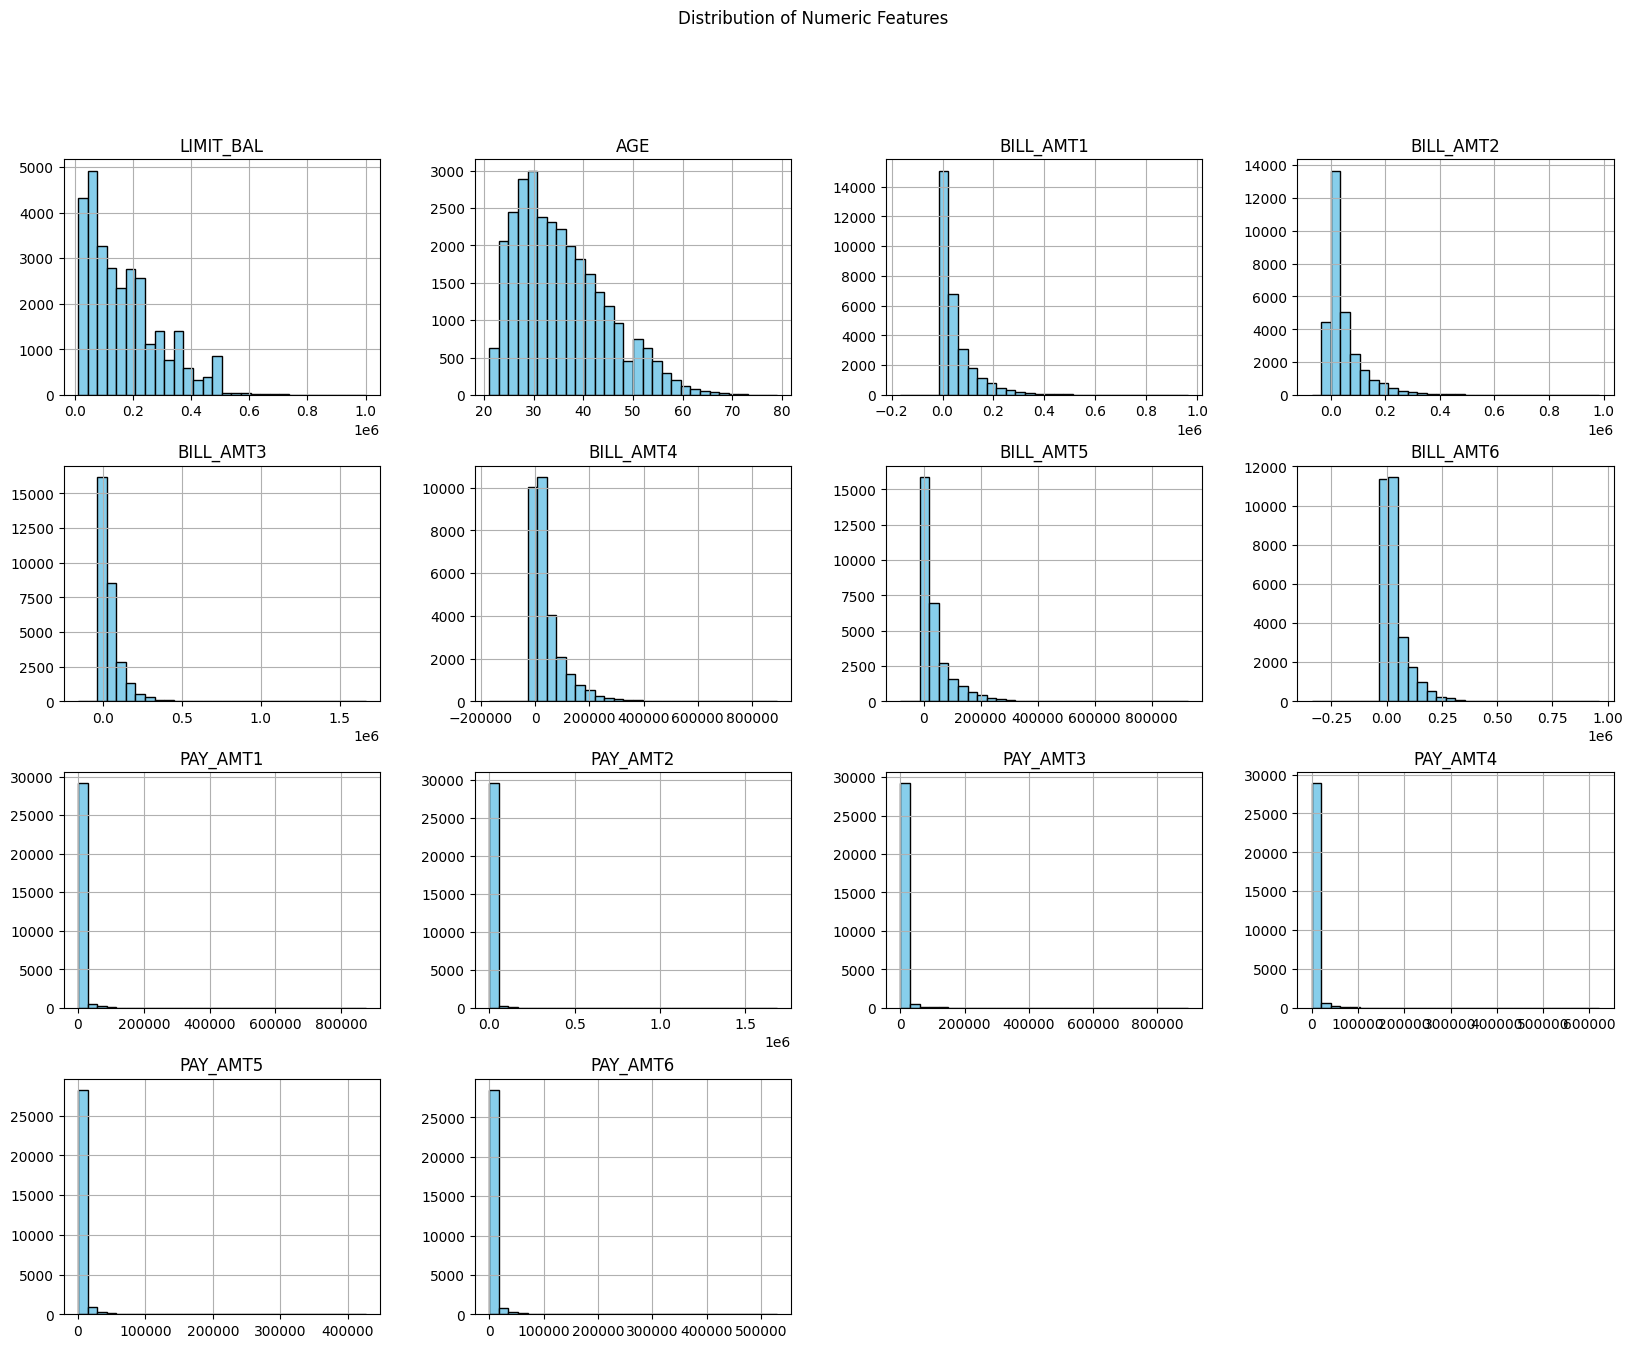

In [10]:
# Distribution of Numeric Features
numeric_features = [
    "LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
    "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2",
    "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]
df[numeric_features].hist(bins=30, figsize=(20, 15), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numeric Features")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24176\1240044856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis")


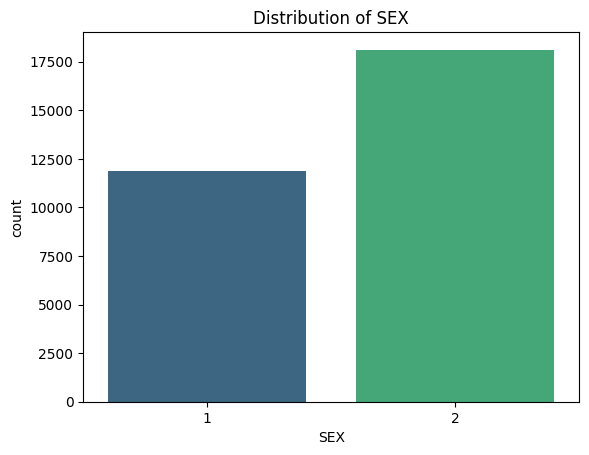

C:\Users\DELL\AppData\Local\Temp\ipykernel_24176\1240044856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis")


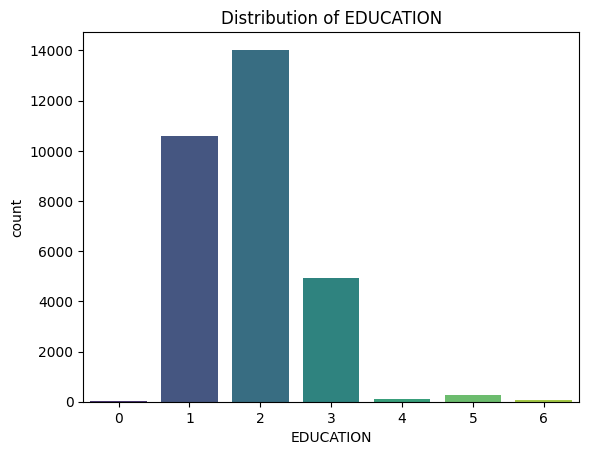

C:\Users\DELL\AppData\Local\Temp\ipykernel_24176\1240044856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis")


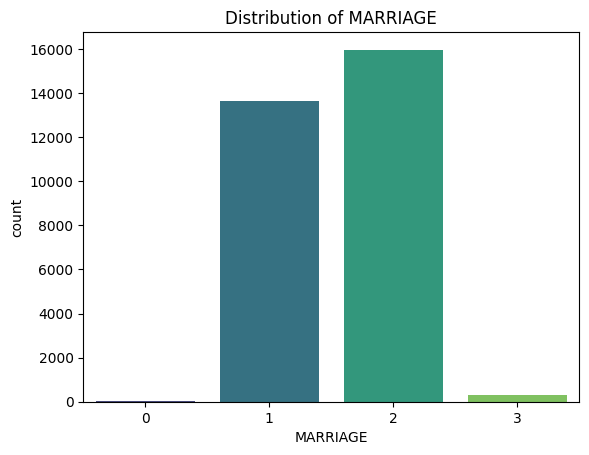

In [11]:
# Categorical Variable Distribution
categorical_features = ["SEX", "EDUCATION", "MARRIAGE"]
for feature in categorical_features:
    sns.countplot(data=df, x=feature, palette="viridis")
    plt.title(f"Distribution of {feature}")
    plt.show()

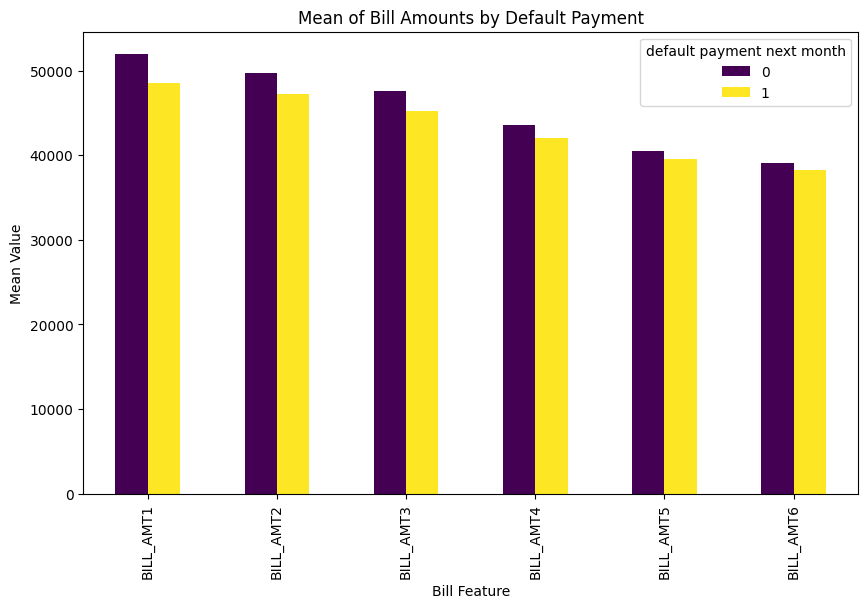

In [12]:
# Grouped Mean of BILL_AMT by Default
bill_features = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
grouped_data = df.groupby("default payment next month")[bill_features].mean()
grouped_data.T.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Mean of Bill Amounts by Default Payment")
plt.ylabel("Mean Value")
plt.xlabel("Bill Feature")
plt.show()

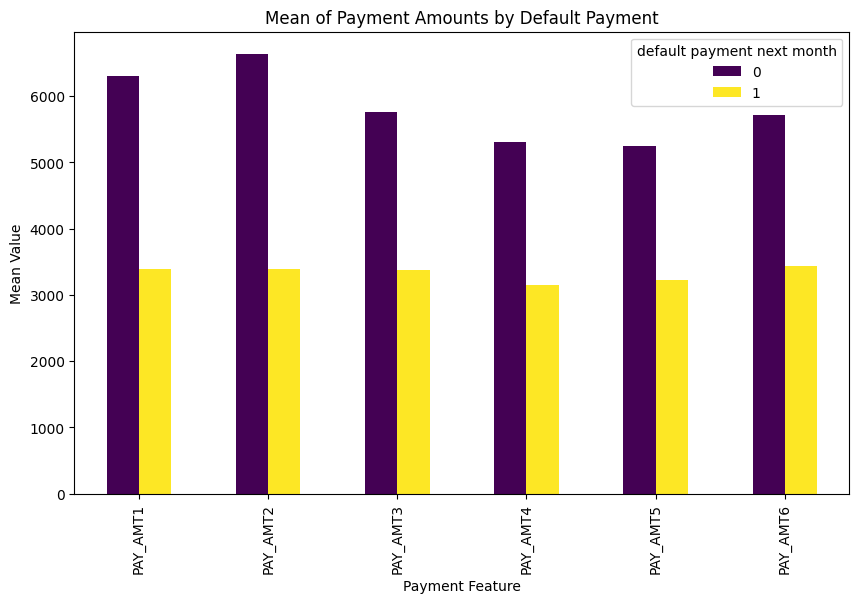

In [13]:
# Summary of Payments by Default
pay_features = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
grouped_data = df.groupby("default payment next month")[pay_features].mean()
grouped_data.T.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Mean of Payment Amounts by Default Payment")
plt.ylabel("Mean Value")
plt.xlabel("Payment Feature")
plt.show()

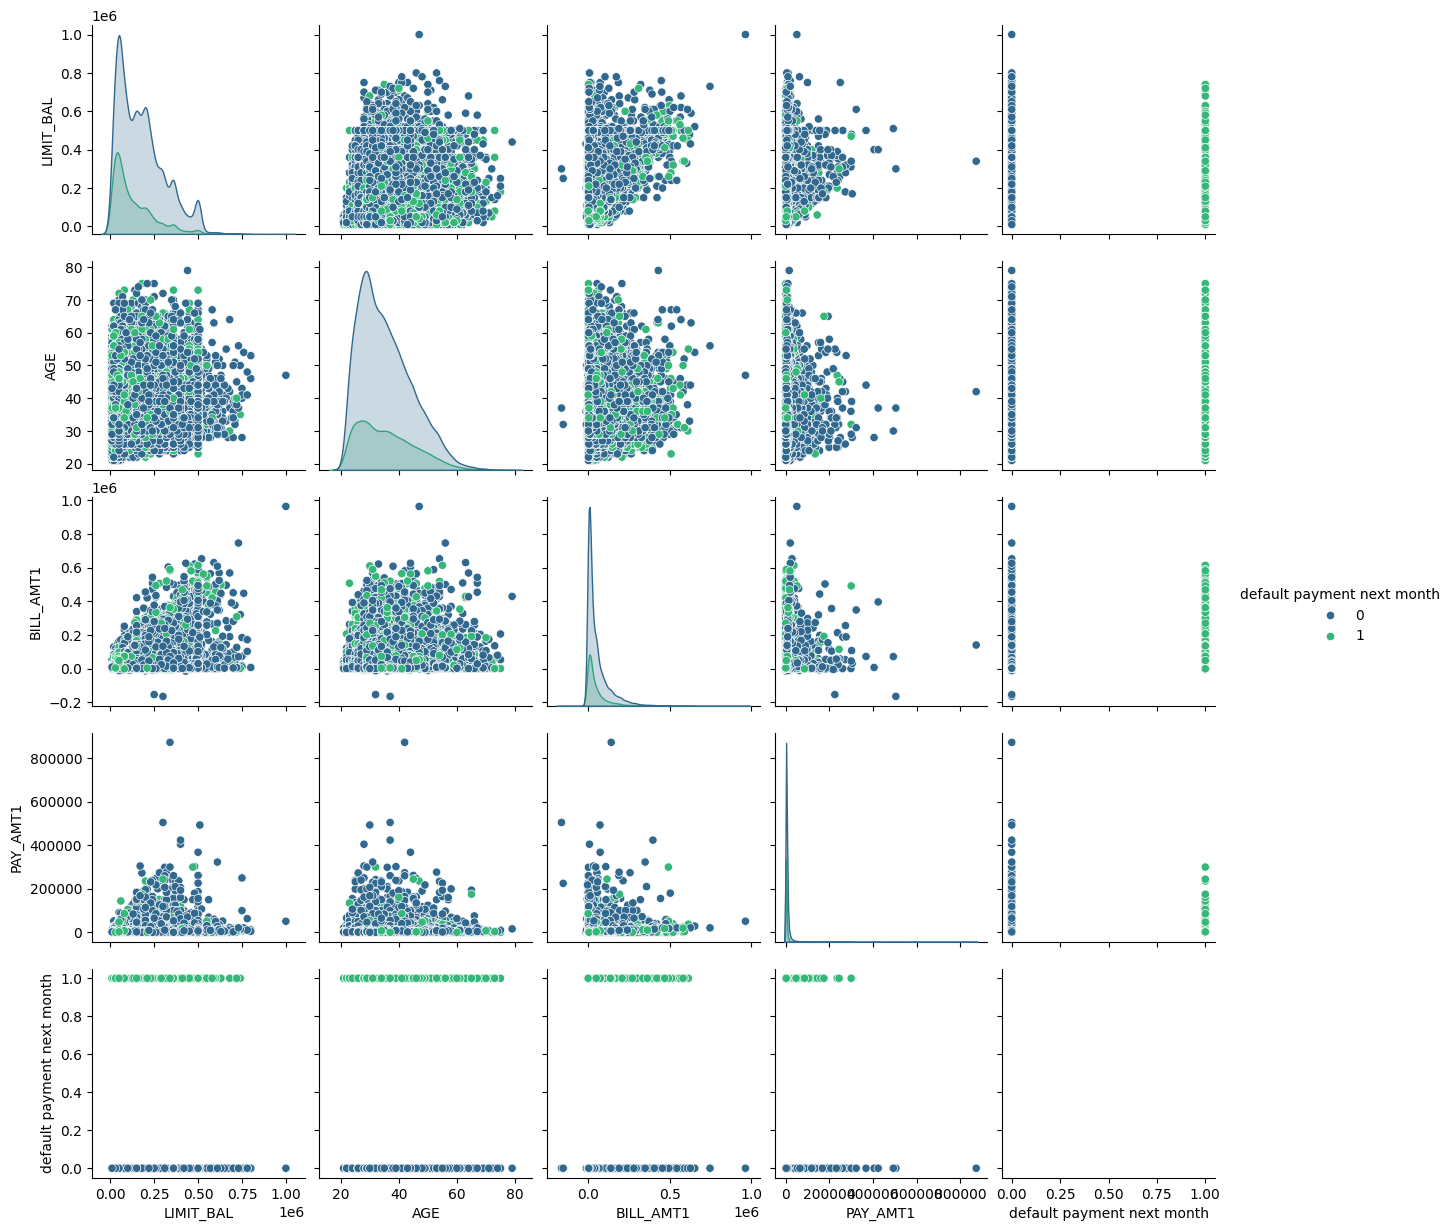

In [14]:
# Pairwise Relationships
sns.pairplot(df, vars=["LIMIT_BAL", "AGE", "BILL_AMT1", "PAY_AMT1", "default payment next month"], hue="default payment next month", palette="viridis")
plt.show()

Here are some insights based on the pairplot:

*General Observations:*
1. **Credit Limit (`LIMIT_BAL`)**:
   - Most customers have a credit limit below 500,000.
   - Customers with higher credit limits tend to have higher billing amounts, but there are still defaults observed even at higher credit limits, indicating credit limit alone is not a definitive indicator of default risk.

2. **Age (`AGE`)**:
   - The majority of the customers are aged between 20 and 50.
   - No clear relationship is visible between age and credit limit, billing amount, or payment amount. This suggests age might not be a strong predictor of default behavior.

3. **Billing Amount (`BILL_AMT1`)**:
   - Billing amounts are highly concentrated below 200,000, with some outliers in the higher range.
   - There is a slight positive correlation between credit limit and billing amount, as customers with higher credit limits generally tend to have higher billing amounts.

4. **Payment Amount (`PAY_AMT1`)**:
   - Most payment amounts are low, even for customers with high billing amounts. This may suggest a mismatch between the amounts billed and paid.

---

*Insights Related to Default (`default payment next month`):*
1. **Credit Limit and Default**:
   - Defaults are more common among customers with lower credit limits.
   - Customers with higher credit limits appear less likely to default, although some defaults still occur in this group.

2. **Billing Amount and Default**:
   - Higher billing amounts seem to be associated with a higher likelihood of default, especially when the payments (`PAY_AMT1`) are relatively low compared to the bills.

3. **Payment Amount and Default**:
   - Defaulting customers (`default payment next month = 1`) often make smaller payments compared to their bills, suggesting an inability or unwillingness to settle their debts.

---

*Key Risk Factors:*
1. **Low Credit Limit and High Billing Amount**:
   - Customers with low credit limits and high billing amounts show a higher likelihood of default, potentially due to financial strain.

2. **Payment-Billing Mismatch**:
   - A significant gap between the billed amount and the payment made could be an important indicator of default risk.

3. **Demographics**:
   - While age does not seem to directly influence default behavior, it might interact with other variables such as credit limit and financial stability, which require deeper analysis.

In [15]:
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


# 2. Explorative Data Analysis (EDA)

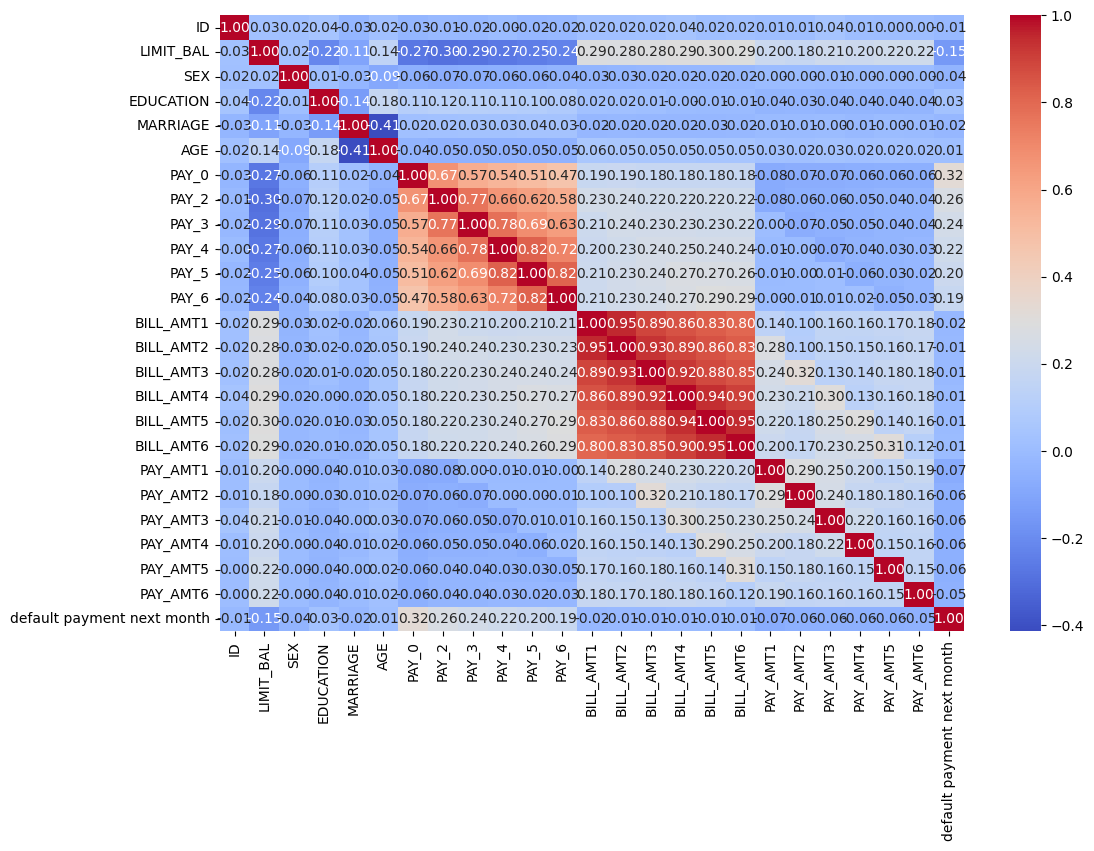

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Key Observations:
Diagonal values:

The diagonal values are all 1 because each variable is perfectly correlated with itself.
Color scale:

Red hues indicate a strong positive correlation (values close to +1).
Blue hues indicate a strong negative correlation (values close to -1).
Neutral (white) values indicate little to no correlation (values close to 0).
Key variable relationships:

PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, and PAY_6: These payment history variables show a strong positive correlation with one another. This suggests that the payment behaviors across different months are interrelated.
BILL_AMT variables: High positive correlations exist between BILL_AMT1 through BILL_AMT6, indicating that bill amounts across months are closely related.
PAY_AMT variables: Similar high correlations are seen among PAY_AMT1 through PAY_AMT6, indicating payment amounts across months are interdependent.
Target Variable (default payment next month):

The target variable has weak correlations with most features.
There is a slightly stronger relationship with variables like PAY_0, LIMIT_BAL, and BILL_AMT, suggesting that these may be somewhat influential in predicting default.
Low correlations:

Features like ID, SEX, EDUCATION, and MARRIAGE show very weak correlations with other variables and the target, indicating they might have minimal impact on the model.

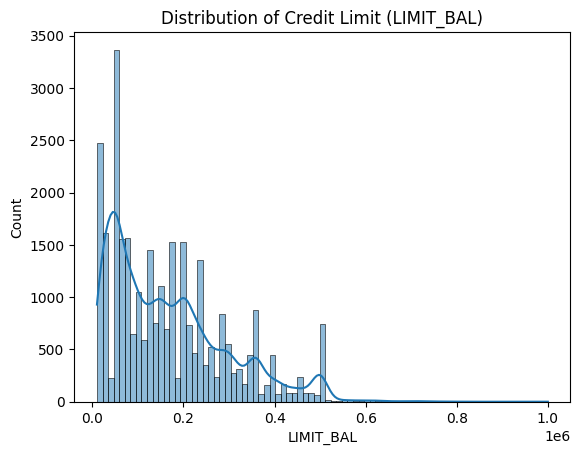

In [17]:
# Distribution of LIMIT_BAL
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title("Distribution of Credit Limit (LIMIT_BAL)")
plt.show()

In [18]:
# Assume 'default payment next month' is the target column in your dataset, where 1 indicates fraud and 0 indicates non-fraud.
no_fraud_count = df[df['default payment next month'] == 0].shape[0]
fraud_count = df[df['default payment next month'] == 1].shape[0]

# Calculate the proportions
total_count = no_fraud_count + fraud_count
no_fraud_proportion = no_fraud_count / total_count
fraud_proportion = fraud_count / total_count

# Display the counts and proportions
print(f"Non-Fraud Count: {no_fraud_count}")
print(f"Fraud Count: {fraud_count}")
print(f"Non-Fraud Proportion: {no_fraud_proportion:.2%}")
print(f"Fraud Proportion: {fraud_proportion:.2%}")

Non-Fraud Count: 23364
Fraud Count: 6636
Non-Fraud Proportion: 77.88%
Fraud Proportion: 22.12%


C:\Users\DELL\AppData\Local\Temp\ipykernel_24176\2530517538.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_labels, y=fraud_counts, palette='viridis')


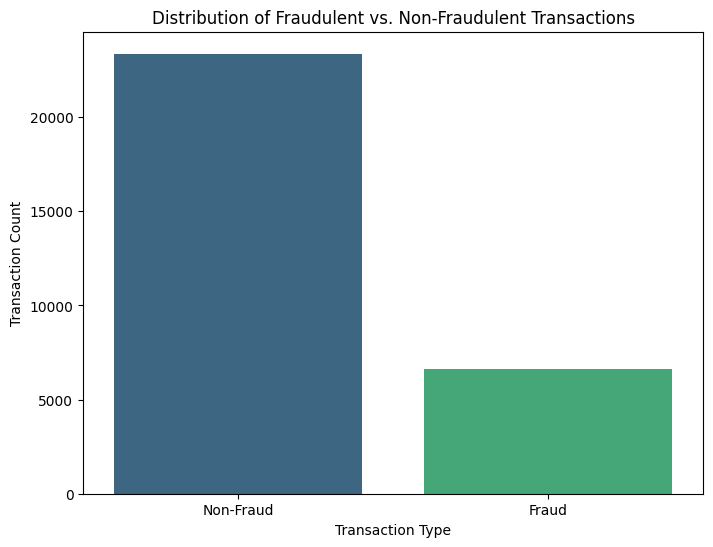

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
# Assuming 'default payment next month' column indicates fraud status (1 = fraud, 0 = non-fraud)
# and 'trans_date' indicates transaction date

# Bar Chart: Distribution of Fraud vs Non-Fraud Transactions
fraud_counts = df['default payment next month'].value_counts()
fraud_labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_labels, y=fraud_counts, palette='viridis')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.show()

# 2. Feature Engineering & Model Implement

## 2.1. Feature Engineering

In [20]:
# Average payment amount across billing cycles
df['avg_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Total payment amount across billing cycles
df['total_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

# Average payment amount made
df['avg_pay_amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

# Total payment amount made
df['total_pay_amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

In [21]:
# Utilization for each billing month
for i in range(1, 7):
    df[f'credit_utilization_{i}'] = df[f'BILL_AMT{i}'] / df['LIMIT_BAL']

# Average credit utilization across billing cycles
df['avg_credit_utilization'] = df[[f'credit_utilization_{i}' for i in range(1, 7)]].mean(axis=1)

In [22]:
# Calculate delayed payment frequency
df['total_late_payments'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1)

# Average delay in payments
df['avg_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Count of severe delays (over 2 months)
df['severe_delays'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x >= 2).sum(), axis=1)


In [23]:
# Trend in bill amounts (difference between consecutive billing cycles)
df['bill_amt_trend'] = df['BILL_AMT1'] - df['BILL_AMT6']

# Trend in payment amounts (difference between first and last payments)
df['pay_amt_trend'] = df['PAY_AMT1'] - df['PAY_AMT6']

# Difference between payment and bill amounts to measure ability to cover bills
df['pay_vs_bill_trend'] = df['total_pay_amt'] - df['total_bill_amt']

In [24]:
# Average Delay in Payments
df['avg_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Total Number of Defaults
df['total_defaults'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1)

# Payment Trends (Example: Ratio of last to first payment amount)
df['payment_trend'] = df['PAY_AMT6'] / (df['PAY_AMT1'] + 1)  # Adding 1 to avoid division by zero

In [25]:
# Ratio of average payment to credit limit
df['payment_limit_ratio'] = df['avg_pay_amt'] / df['LIMIT_BAL']

# Ratio of total payments to total bills
df['pay_bill_ratio'] = df['total_pay_amt'] / (df['total_bill_amt'] + 1)  # +1 to avoid division by zero

# Ratio of average delay to age (normalized delay)
df['delay_age_ratio'] = df['avg_delay'] / (df['AGE'] + 1)

In [26]:
# Difference between credit limit and most recent bill amount
df['limit_vs_recent_bill'] = df['LIMIT_BAL'] - df['BILL_AMT1']

# Difference between most recent bill and previous bill
df['recent_bill_difference'] = df['BILL_AMT1'] - df['BILL_AMT2']

# Difference between most recent payment and previous payment
df['recent_payment_difference'] = df['PAY_AMT1'] - df['PAY_AMT2']

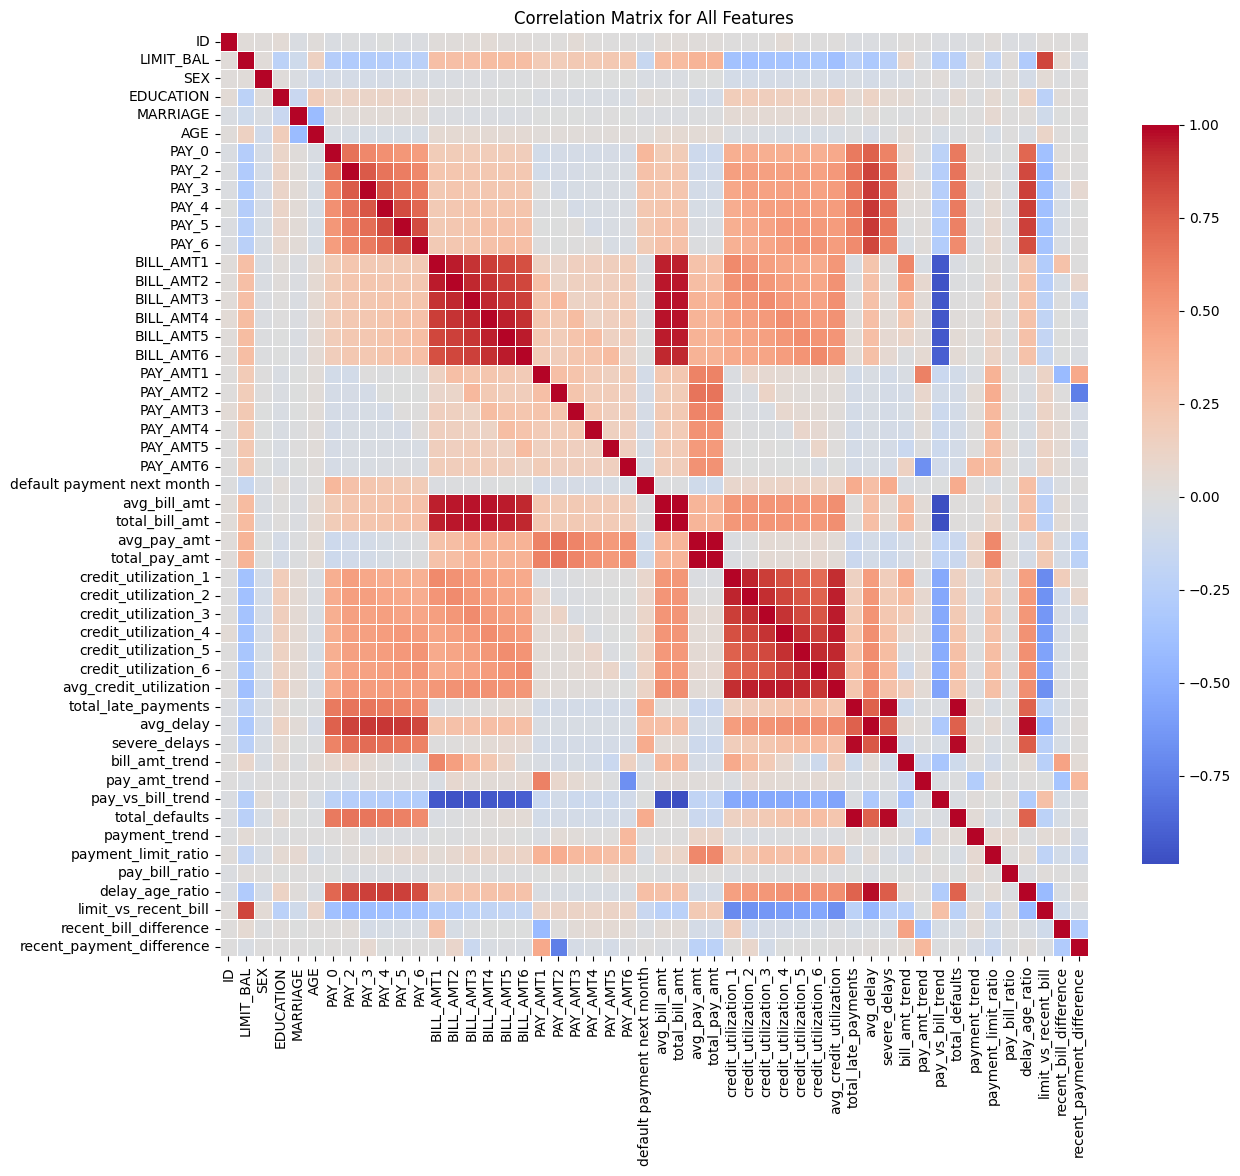

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix for All Features')
plt.show()

In [28]:
correlation_matrix

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,pay_amt_trend,pay_vs_bill_trend,total_defaults,payment_trend,payment_limit_ratio,pay_bill_ratio,delay_age_ratio,limit_vs_recent_bill,recent_bill_difference,recent_payment_difference
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.004926,-0.021408,-0.019853,-0.015380,0.021287,-0.017479,-0.019506,0.015190,0.006518,-0.001334
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,-0.030554,-0.256616,-0.236763,0.042304,-0.181807,0.014676,-0.294224,0.838802,0.053304,-0.036187
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,0.002059,0.026272,-0.043760,0.002224,-0.039047,0.007278,-0.068210,0.043890,-0.011365,0.001157
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,0.001866,-0.018818,0.048667,-0.016314,0.052819,-0.009007,0.122938,-0.232764,0.017721,0.002959
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,0.000868,0.023734,-0.008300,0.001688,0.063664,0.000509,0.016949,-0.094908,-0.008415,0.003608
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.003958,-0.050634,-0.015356,0.004661,-0.049438,0.004382,-0.036158,0.112902,0.012239,-0.002842
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,-0.012306,-0.220029,0.635398,0.013602,-0.012292,-0.008825,0.716975,-0.377738,0.011548,0.012472
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,-0.031360,-0.264440,0.661151,0.024257,0.016082,-0.025812,0.825610,-0.430094,0.024331,0.000929
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.030046,-0.258630,0.653741,-0.035131,0.038599,-0.025267,0.854302,-0.404820,-0.067801,0.064392
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.014463,-0.264100,0.634303,-0.024580,0.057551,-0.024950,0.867078,-0.382924,-0.050164,-0.004551


This correlation matrix highlights the relationship between various features and the target variable, **default payment next month** (DEFAULT). Here’s a summary focusing on the correlations with the target:

- **PAY_0 to PAY_6** (payment status) show strong negative correlations with **DEFAULT**, suggesting that poor payment history (e.g., PAY_0 = 1) is closely linked to a higher likelihood of default.
- **LIMIT_BAL** (credit limit) has a weak positive correlation with **DEFAULT**, implying that higher credit limits might slightly increase the likelihood of default.
- **BILL_AMT1 to BILL_AMT6** (bill amounts) exhibit moderate positive correlations with **DEFAULT**, indicating that larger outstanding bills may correlate with a higher risk of default.
- **PAY_AMT1 to PAY_AMT6** (payment amounts) show weak negative correlations with **DEFAULT**, implying that regular payments might slightly reduce the chances of default, though the relationship is less pronounced.
- **AGE** has a very weak positive correlation with **DEFAULT**, indicating that age doesn’t strongly influence the likelihood of default in this dataset.
- **SEX**, **EDUCATION**, and **MARRIAGE** have weak or no significant correlations with **DEFAULT**, suggesting that demographic factors have minimal impact on the likelihood of default.

In summary, **payment status** and **bill amounts** are the most significant predictors of default payment, with weak influences from credit limit and payments. Demographic features like **age**, **sex**, **education**, and **marital status** have little impact on predicting default.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

## 2.2. Model Development

### 2.2.3. SMOTE -93%

In [30]:
# Separate features and target
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
X_train = pd.get_dummies(X_train)  # One-hot encode categorical features if any
X_train = X_train.astype(float)    # Ensure all data is numeric

In [32]:
from imblearn.over_sampling import ADASYN
from collections import Counter

print(f'Class distribution in y_train before ADASYN: {Counter(y_train)}')

adasyn = ADASYN(random_state=42, n_neighbors=5)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

print(f'Class distribution in y_train after ADASYN: {Counter(y_train_res)}')

Class distribution in y_train before ADASYN: Counter({0: 16324, 1: 4676})
Class distribution in y_train after ADASYN: Counter({1: 16888, 0: 16324})


In [33]:
# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Define hyperparameters for GridSearchCV
param_dist = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.1, 1, 10]
}

In [34]:
# Define a reduced parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],   # Reduced range
    'max_depth': [3, 5, 7],           # Limited to a few values
    'learning_rate': [0.01, 0.1, 0.2] # Commonly used rates
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_res, y_train_res)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Output performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Accuracy: 0.8173333333333334


In [35]:
# Print classification report to evaluate precision and recall
print("Classification Report:\n", classification_report(y_test, y_pred))

# Extract precision and recall for both classes
precision_0, recall_0, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 0])
precision_1, recall_1, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Print precision and recall values for both classes
print(f'Precision (Class 0): {precision_0[-1]:.2f}, Recall (Class 0): {recall_0[-1]:.2f}')
print(f'Precision (Class 1): {precision_1[-1]:.2f}, Recall (Class 1): {recall_1[-1]:.2f}')

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      7040
           1       0.63      0.40      0.49      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.67      0.69      9000
weighted avg       0.80      0.82      0.80      9000

Precision (Class 0): 1.00, Recall (Class 0): 0.00
Precision (Class 1): 1.00, Recall (Class 1): 0.00


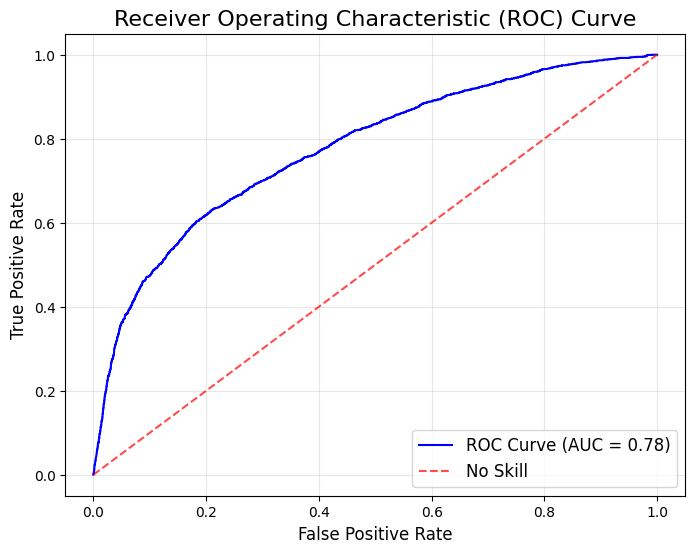

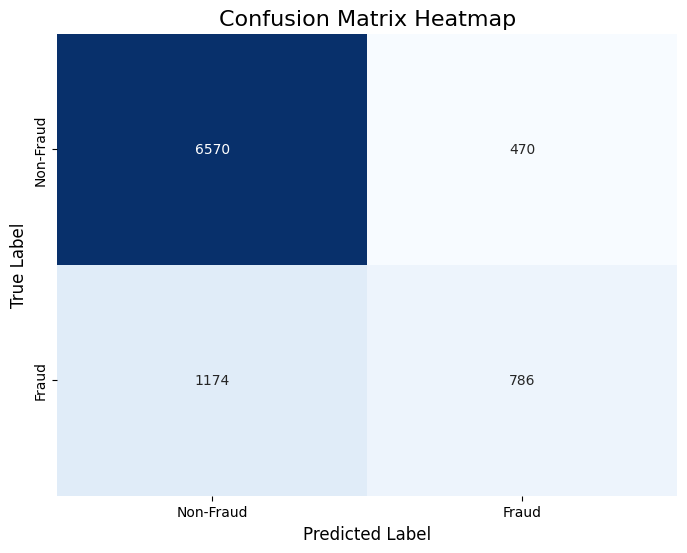

In [36]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])), color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill', alpha=0.7)  # Diagonal line
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.show()

In [37]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get feature importances
xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("XGBoost Feature Importances:")
print(xgb_feature_importances)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:06:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Feature Importances:
severe_delays                0.344472
total_late_payments          0.133993
PAY_0                        0.123611
PAY_2                        0.025608
avg_bill_amt                 0.018382
limit_vs_recent_bill         0.013907
avg_pay_amt                  0.011713
PAY_5                        0.010955
pay_bill_ratio               0.010400
PAY_AMT1                     0.010286
EDUCATION                    0.009537
credit_utilization_2         0.009511
BILL_AMT2                    0.009479
PAY_AMT2                     0.009326
recent_bill_difference       0.009250
BILL_AMT5                    0.009024
BILL_AMT4                    0.008782
SEX                          0.008741
payment_limit_ratio          0.008727
PAY_AMT4                     0.008693
PAY_AMT5                     0.008684
BILL_AMT1                    0.008515
avg_credit_utilization       0.008461
PAY_AMT6                     0.008438
PAY_AMT3                     0.008437
avg_delay            

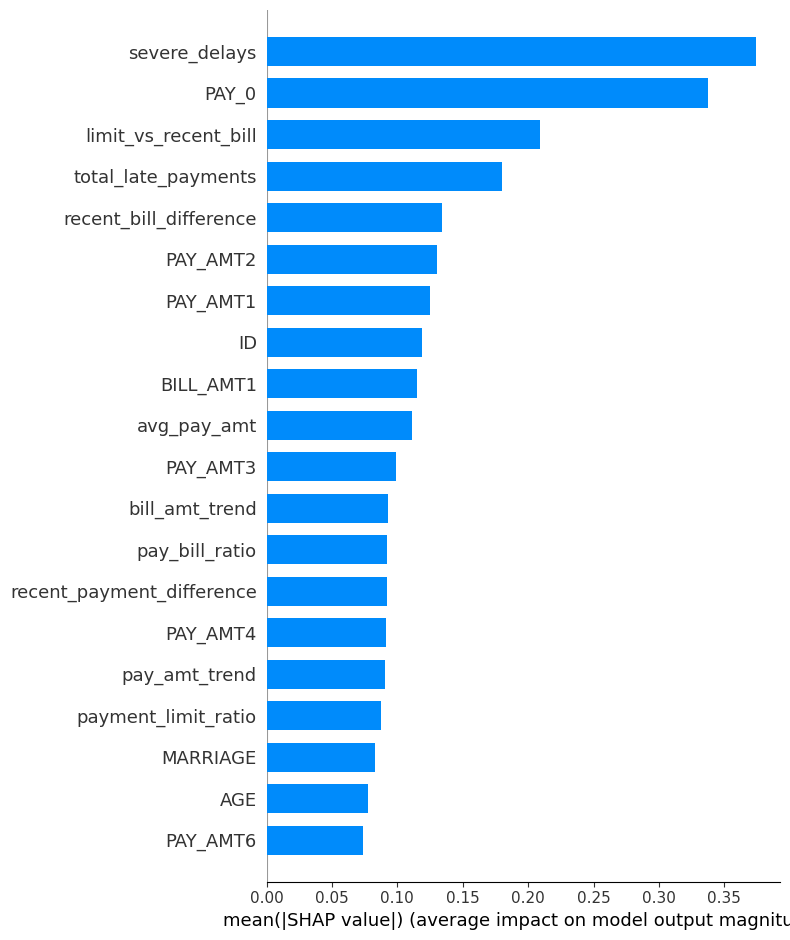

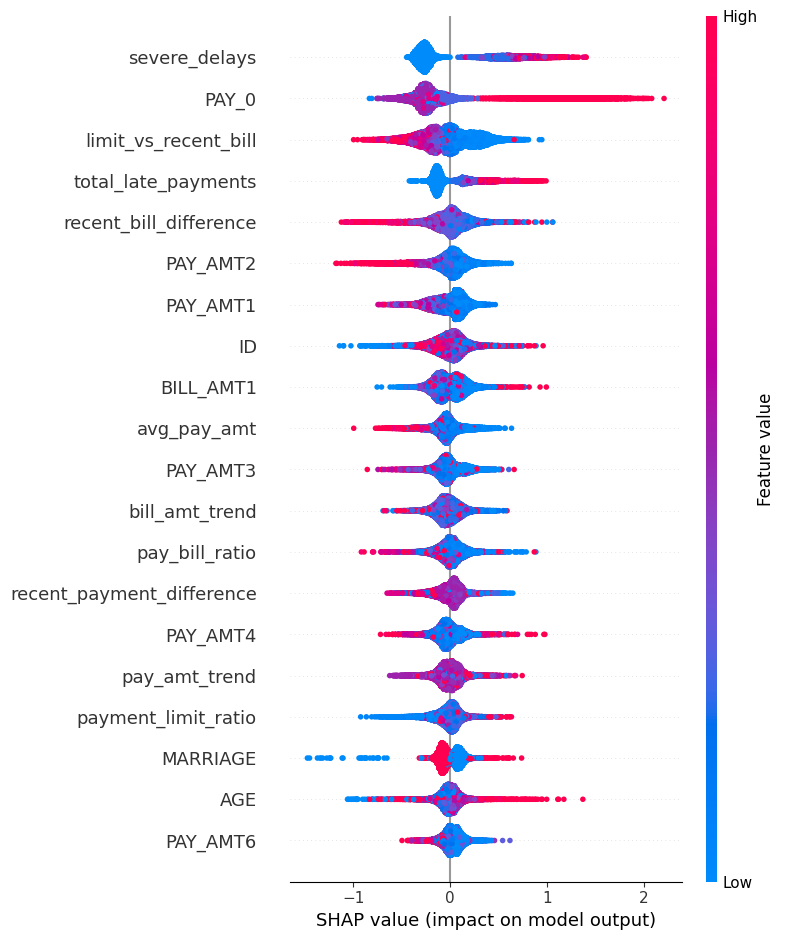

In [38]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Summary plot of SHAP values to show feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Detailed SHAP summary plot (to see the effect of each feature on predictions)
shap.summary_plot(shap_values, X_train)

In [39]:
shap_importances = pd.DataFrame(list(zip(X.columns, shap_values.mean(0).tolist())), columns=["Feature", "Mean SHAP Value"])
shap_importances = shap_importances.sort_values(by="Mean SHAP Value", ascending=False)

print("SHAP Feature Importances:")
print(shap_importances)

SHAP Feature Importances:
                      Feature  Mean SHAP Value
23                   PAY_AMT6         0.016937
16                  BILL_AMT5         0.015459
9                       PAY_4         0.011474
28       credit_utilization_1         0.010333
32       credit_utilization_5         0.006832
24               avg_bill_amt         0.005171
29       credit_utilization_2         0.003915
8                       PAY_3         0.002506
44             pay_bill_ratio         0.002479
17                  BILL_AMT6         0.001054
14                  BILL_AMT3         0.001015
27              total_pay_amt         0.000000
25             total_bill_amt         0.000000
41             total_defaults         0.000000
35        total_late_payments        -0.000067
10                      PAY_5        -0.000392
4                    MARRIAGE        -0.000457
45            delay_age_ratio        -0.000814
2                         SEX        -0.001147
3                   EDUCATION     

In [40]:
# Step 4: Compare XGBoost Feature Importances and SHAP Feature Importances
# Identify the best feature based on both methods

best_feature_xgb = xgb_feature_importances.idxmax()
best_feature_shap = shap_importances['Feature'].iloc[0]

print(f"Best Feature according to XGBoost: {best_feature_xgb}")
print(f"Best Feature according to SHAP: {best_feature_shap}")

Best Feature according to XGBoost: severe_delays
Best Feature according to SHAP: PAY_AMT6


Top 5 Features according to XGBoost:
severe_delays          0.344472
total_late_payments    0.133993
PAY_0                  0.123611
PAY_2                  0.025608
avg_bill_amt           0.018382
dtype: float32
Top 5 Features according to SHAP:
                 Feature  Mean SHAP Value
23              PAY_AMT6         0.016937
16             BILL_AMT5         0.015459
9                  PAY_4         0.011474
28  credit_utilization_1         0.010333
32  credit_utilization_5         0.006832


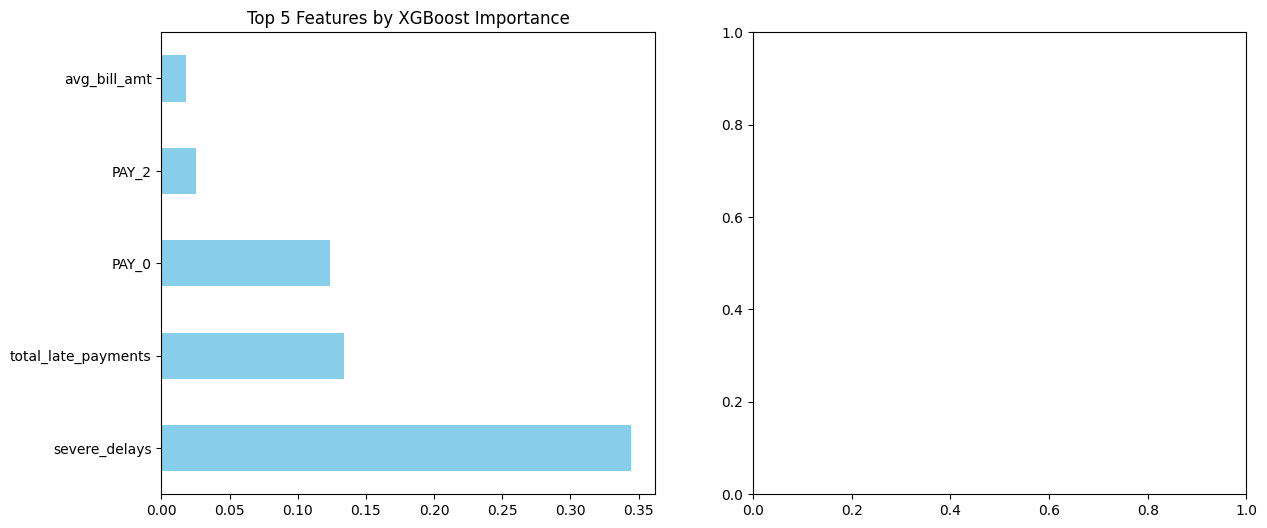

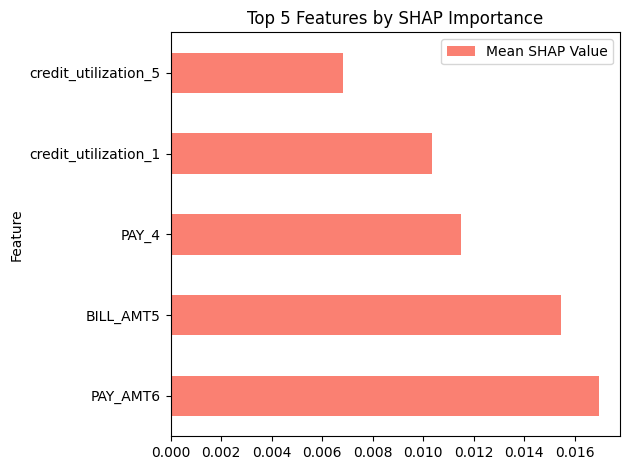

In [41]:
# Top 5 features according to XGBoost (highest importance)
top_5_features_xgb = xgb_feature_importances.head(5)
print("Top 5 Features according to XGBoost:")
print(top_5_features_xgb)

# Top 5 features according to SHAP (highest mean SHAP value)
top_5_features_shap = shap_importances.head(5)
print("Top 5 Features according to SHAP:")
print(top_5_features_shap)

# Step 5: Plot the top 5 features from XGBoost and SHAP for comparison
plt.figure(figsize=(14, 6))

# Plot XGBoost Top 5 Features
plt.subplot(1, 2, 1)
top_5_features_xgb.plot(kind='barh', color='skyblue')
plt.title('Top 5 Features by XGBoost Importance')

# Plot SHAP Top 5 Features
plt.subplot(1, 2, 2)
top_5_features_shap.plot(kind='barh', x='Feature', y='Mean SHAP Value', color='salmon')
plt.title('Top 5 Features by SHAP Importance')

plt.tight_layout()
plt.show()

In [42]:
X = df.drop(columns=['default payment next month'])  # Remove the target column from features
y = df['default payment next month']

In [43]:
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,pay_amt_trend,pay_vs_bill_trend,total_defaults,payment_trend,payment_limit_ratio,pay_bill_ratio,delay_age_ratio,limit_vs_recent_bill,recent_bill_difference,recent_payment_difference
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,-7015,2,0.000000,0.005742,0.089422,-0.013333,16087,811,-689
1,2,120000,2,2,2,26,-1,2,0,0,...,-2000,-12077,2,2000.000000,0.006944,0.292774,0.018519,117318,957,-1000
2,3,90000,2,2,2,34,0,0,0,0,...,-3482,-90635,0,3.291639,0.020404,0.108387,0.000000,60761,15212,18
3,4,50000,2,2,1,37,0,0,0,0,...,1000,-222946,0,0.499750,0.027960,0.036259,0.000000,3010,-1243,-19
4,5,50000,1,2,1,57,-1,0,-1,0,...,1321,-50290,0,0.339330,0.196830,0.540049,-0.005747,41383,2947,-34681


In [44]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

### 2.3. Rebalance & Model Development - Best result - 94%

C:\Users\DELL\AppData\Local\Temp\ipykernel_24176\2530517538.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_labels, y=fraud_counts, palette='viridis')


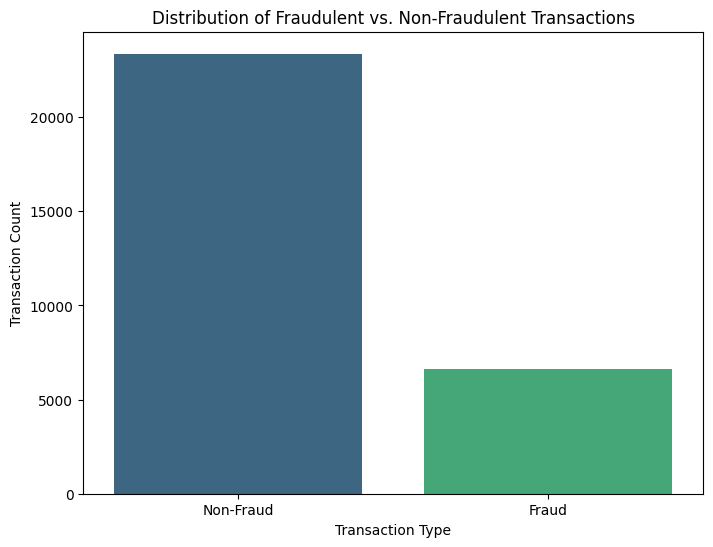

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
# Assuming 'default payment next month' column indicates fraud status (1 = fraud, 0 = non-fraud)
# and 'trans_date' indicates transaction date

# Bar Chart: Distribution of Fraud vs Non-Fraud Transactions
fraud_counts = df['default payment next month'].value_counts()
fraud_labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_labels, y=fraud_counts, palette='viridis')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7009
           1       0.53      0.43      0.47      1991

    accuracy                           0.79      9000
   macro avg       0.69      0.66      0.67      9000
weighted avg       0.78      0.79      0.78      9000



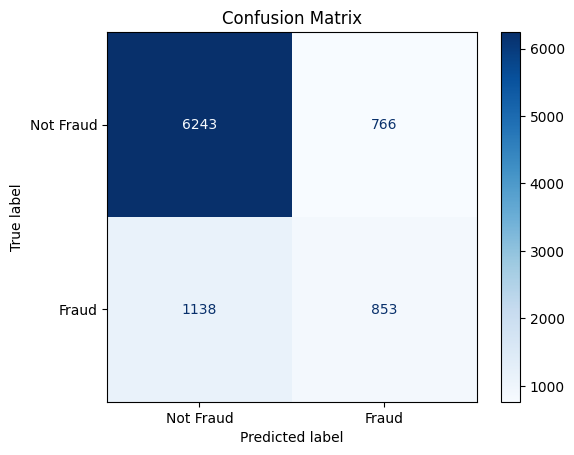

Precision for Class 0 (Not Fraud): 0.85
Recall for Class 0 (Not Fraud): 0.89
Precision for Class 1 (Fraud): 0.53
Recall for Class 1 (Fraud): 0.43


In [46]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply SMOTE to balance classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train the XGBClassifier
xgb = XGBClassifier(
    random_state=42, 
    scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])
)
xgb.fit(X_train_scaled, y_train_resampled)

# Predict on the test set
y_pred = xgb.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Precision and Recall for both classes
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

print(f"Precision for Class 0 (Not Fraud): {precision_0:.2f}")
print(f"Recall for Class 0 (Not Fraud): {recall_0:.2f}")
print(f"Precision for Class 1 (Fraud): {precision_1:.2f}")
print(f"Recall for Class 1 (Fraud): {recall_1:.2f}")


Base Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7009
           1       0.46      0.55      0.50      1991

    accuracy                           0.76      9000
   macro avg       0.66      0.68      0.67      9000
weighted avg       0.78      0.76      0.77      9000

Cascade Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7009
           1       0.73      0.55      0.63      1991

    accuracy                           0.86      9000
   macro avg       0.81      0.75      0.77      9000
weighted avg       0.85      0.86      0.85      9000



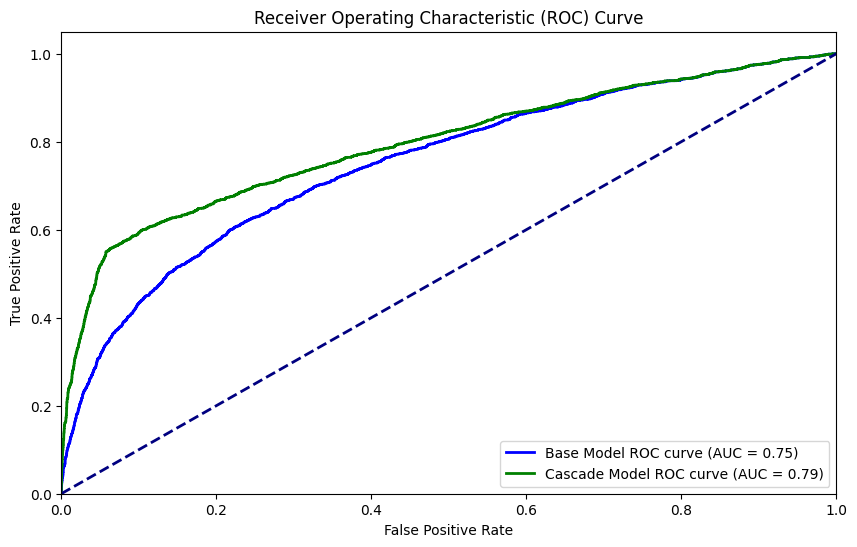

Confusion Matrix for Base Model:


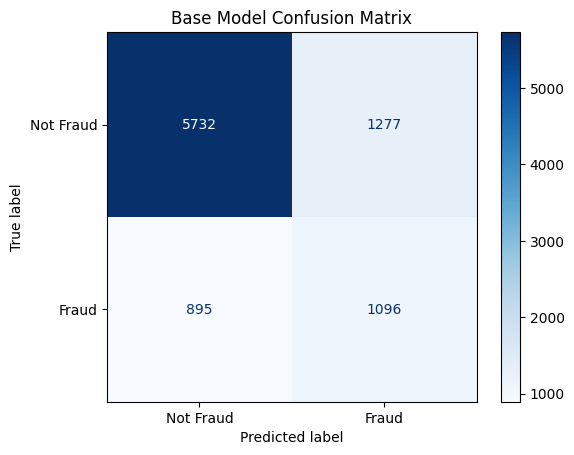

Confusion Matrix for Cascade Model:


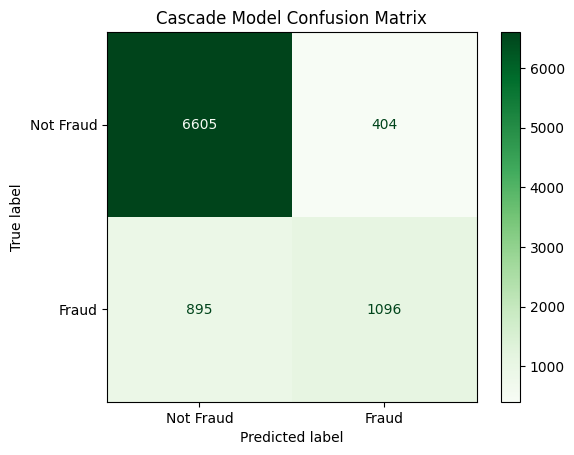

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Train the Base Classifier
base_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
base_model.fit(X_train_scaled, y_train)

# Get predictions from the base classifier
y_pred_base = base_model.predict(X_test_scaled)
y_prob_base = base_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

# Evaluate the base classifier
print("Base Model Classification Report:")
print(classification_report(y_test, y_pred_base))

# Step 2: Identify False Positives
false_positives_idx = np.where((y_pred_base == 1) & (y_test == 0))[0]
X_test_false_positives = X_test_scaled[false_positives_idx]
y_test_false_positives = y_test.iloc[false_positives_idx]

# Step 3: Train a Secondary Classifier for the False Positives
secondary_model = XGBClassifier(random_state=42)
secondary_model.fit(X_train_scaled, y_train)

# Re-classify the false positives using the secondary model
y_pred_secondary = secondary_model.predict(X_test_false_positives)
y_prob_secondary = secondary_model.predict_proba(X_test_false_positives)[:, 1]

# Step 4: Combine Predictions from both models
final_predictions = y_pred_base.copy()
final_predictions[false_positives_idx] = y_pred_secondary  # Update only the false positives
final_probs = y_prob_base.copy()
final_probs[false_positives_idx] = y_prob_secondary  # Update probabilities for ROC

# Evaluate the Cascade Model
print("Cascade Model Classification Report:")
print(classification_report(y_test, final_predictions))

# Plot ROC Curve for Base Model
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_base)
roc_auc_base = roc_auc_score(y_test, y_prob_base)
plt.figure(figsize=(10, 6))
plt.plot(fpr_base, tpr_base, color='blue', lw=2, label=f'Base Model ROC curve (AUC = {roc_auc_base:.2f})')

# Plot ROC Curve for Cascade Model
fpr_cascade, tpr_cascade, _ = roc_curve(y_test, final_probs)
roc_auc_cascade = roc_auc_score(y_test, final_probs)
plt.plot(fpr_cascade, tpr_cascade, color='green', lw=2, label=f'Cascade Model ROC curve (AUC = {roc_auc_cascade:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix for Base Model
print("Confusion Matrix for Base Model:")
cm_base = confusion_matrix(y_test, y_pred_base)
disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_base, display_labels=["Not Fraud", "Fraud"])
disp_base.plot(cmap="Blues")
plt.title("Base Model Confusion Matrix")
plt.show()

# Confusion Matrix for Cascade Model
print("Confusion Matrix for Cascade Model:")
cm_cascade = confusion_matrix(y_test, final_predictions)
disp_cascade = ConfusionMatrixDisplay(confusion_matrix=cm_cascade, display_labels=["Not Fraud", "Fraud"])
disp_cascade.plot(cmap="Greens")
plt.title("Cascade Model Confusion Matrix")
plt.show()

In [48]:
# Calculate and print accuracy for Base Model
accuracy_base = np.mean(y_test == y_pred_base)
print(f"Accuracy of the Base Model: {accuracy_base:.2f}")

# Calculate and print accuracy for Cascade Model
accuracy_cascade = np.mean(y_test == final_predictions)
print(f"Accuracy of the Cascade Model: {accuracy_cascade:.2f}")


Accuracy of the Base Model: 0.76
Accuracy of the Cascade Model: 0.86


Confusion Matrix for Base Model:


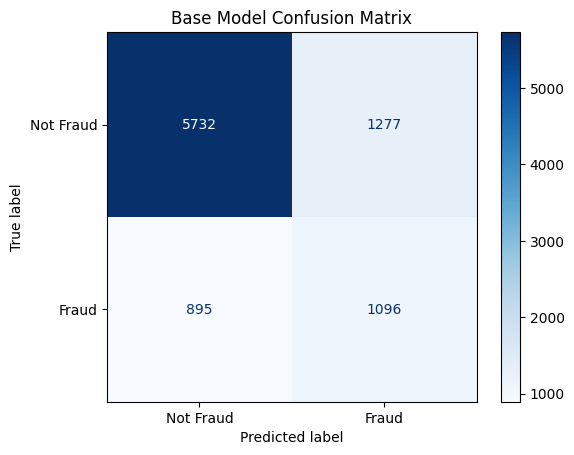

Confusion Matrix for Cascade Model:


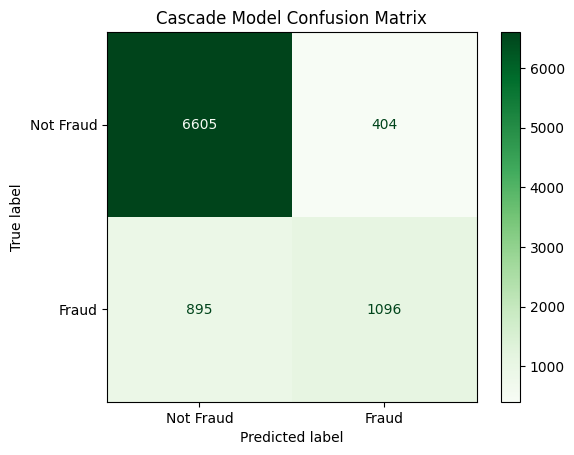

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Base Model
print("Confusion Matrix for Base Model:")
cm_base = confusion_matrix(y_test, y_pred_base)
disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_base, display_labels=["Not Fraud", "Fraud"])
disp_base.plot(cmap="Blues")
plt.title("Base Model Confusion Matrix")
plt.show()

# Confusion Matrix for Cascade Model
print("Confusion Matrix for Cascade Model:")
cm_cascade = confusion_matrix(y_test, final_predictions)
disp_cascade = ConfusionMatrixDisplay(confusion_matrix=cm_cascade, display_labels=["Not Fraud", "Fraud"])
disp_cascade.plot(cmap="Greens")
plt.title("Cascade Model Confusion Matrix")
plt.show()


# Model Explainability:

### Step 1: SHAP Analysis for Base Model


SHAP Analysis for Base Model
Global Explanation for Base Model:


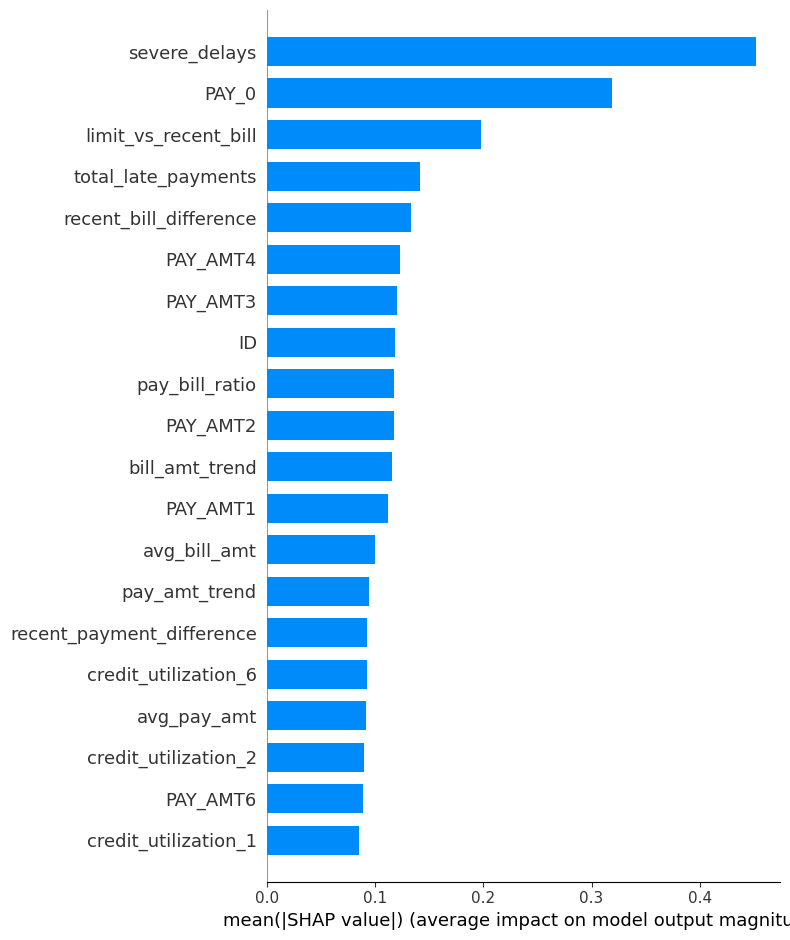

In [50]:
# Step 1: SHAP Analysis for Base Model
print("SHAP Analysis for Base Model")

# Initialize SHAP TreeExplainer for the base model
explainer_base = shap.TreeExplainer(base_model)

# Calculate SHAP values for the test set
shap_values_base = explainer_base.shap_values(X_test_scaled)

# Overall (Global) Explanation for Base Model
print("Global Explanation for Base Model:")
shap.summary_plot(shap_values_base, X_test_scaled, plot_type="bar", feature_names=X.columns)

# Individual Explanation for a Specific Index in Base Model
index_of_interest = 42  # Replace with the index you want to analyze
shap.force_plot(
    explainer_base.expected_value,
    shap_values_base[index_of_interest],
    X_test_scaled[index_of_interest],
    feature_names=X.columns
)

### Step 2: SHAP Analysis for Secondary Model

SHAP Analysis for Secondary Model
Global Explanation for Secondary Model:


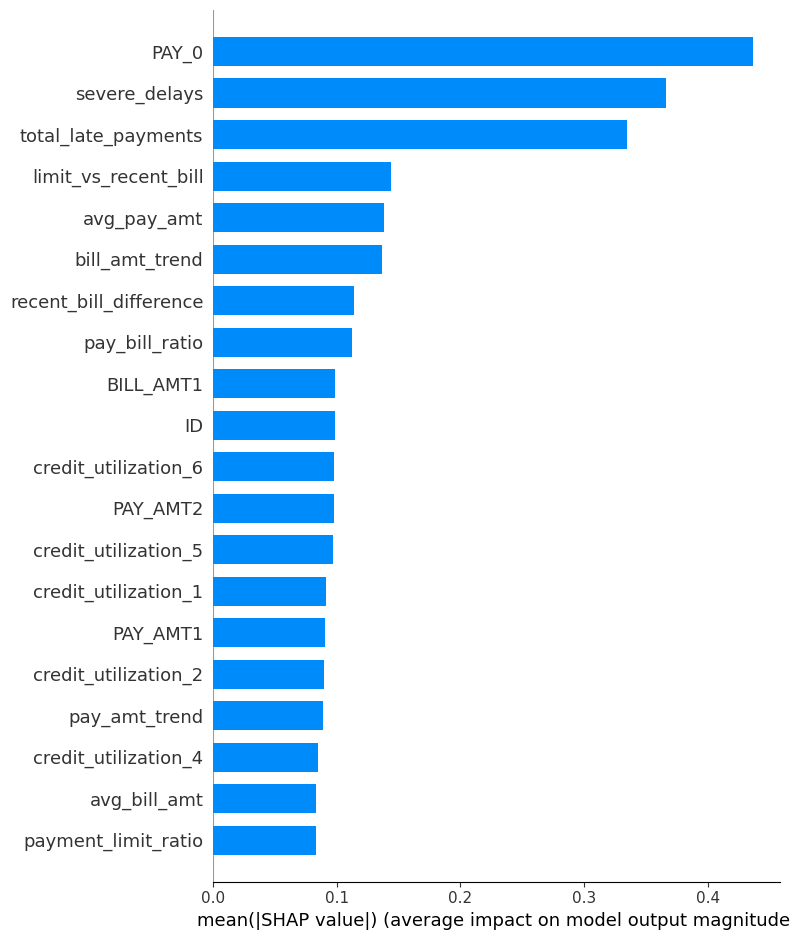

In [51]:
# Step 2: SHAP Analysis for Secondary Model
print("SHAP Analysis for Secondary Model")

# Initialize SHAP TreeExplainer for the secondary model
explainer_secondary = shap.TreeExplainer(secondary_model)

# Calculate SHAP values for the false positives reclassified by the secondary model
shap_values_secondary = explainer_secondary.shap_values(X_test_false_positives)

# Global Explanation for Secondary Model
print("Global Explanation for Secondary Model:")
shap.summary_plot(shap_values_secondary, X_test_false_positives, plot_type="bar", feature_names=X.columns)

In [57]:
# 1. Get predicted labels for the entire test set
predicted_labels = secondary_model.predict(X_test)

# 2. Classify instances into scenarios using vectorized operations
true_positive_idx = np.where((y_test == 1) & (predicted_labels == 1))[0]
true_negative_idx = np.where((y_test == 0) & (predicted_labels == 0))[0]
false_positive_idx = np.where((y_test == 0) & (predicted_labels == 1))[0]
false_negative_idx = np.where((y_test == 1) & (predicted_labels == 0))[0]

# 3. Display top 5 indices for each scenario
print("Top 5 True Positive Indices:", true_positive_idx[:5].tolist())
print("Top 5 True Negative Indices:", true_negative_idx[:5].tolist())
print("Top 5 False Positive Indices:", false_positive_idx[:5].tolist())
print("Top 5 False Negative Indices:", false_negative_idx[:5].tolist())

Top 5 True Positive Indices: [13, 27, 46, 85, 96]
Top 5 True Negative Indices: [0, 2, 3, 4, 5]
Top 5 False Positive Indices: [15, 32, 69, 135, 163]
Top 5 False Negative Indices: [1, 7, 8, 11, 18]


#### Instance 1: True Positive

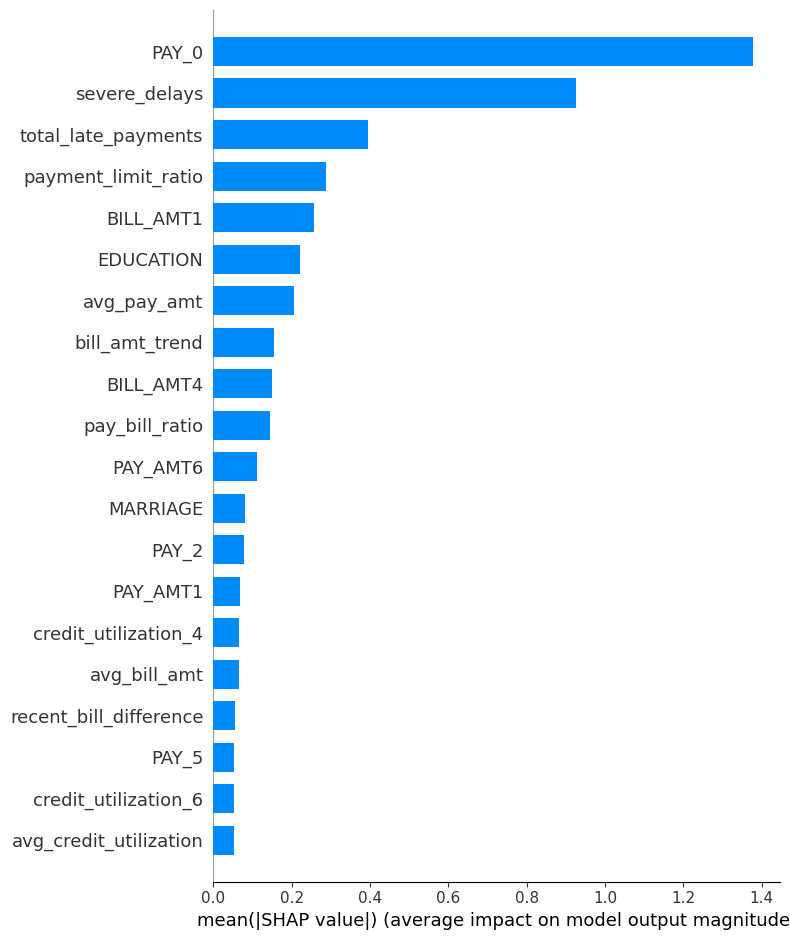

Actual Label for the selected instance: 1
Model Prediction for the selected instance: 1


In [58]:
import shap

# 1. Select a specific instance by index
index_of_interest = 401  # Replace with the index of the instance you're interested in
instance = X_test.iloc[index_of_interest:index_of_interest + 1]  # Select the instance (1-row slice)

# 2. Calculate SHAP values for the selected instance
shap_instance = explainer(instance)

# 3. Plot the SHAP summary plot (bar plot) for the selected instance
shap.summary_plot(shap_instance.values, instance, plot_type="bar", feature_names=X_test.columns)

# 4. Get the actual label for the selected instance
actual_label = y_test.iloc[index_of_interest]

# 5. Get the predicted label for the selected instance
predicted_label = secondary_model.predict(instance)[0]

# 6. Print the actual and predicted results for the selected instance
print(f"Actual Label for the selected instance: {actual_label}")
print(f"Model Prediction for the selected instance: {predicted_label}")

In [59]:
# Retrieve the feature names
feature_names = X.columns

# Get the actual data (unscaled) for the random instance
instance_data = X_test.iloc[index_of_interest]

# Print the actual data (features) for the selected instance
print("Actual Data for the Selected Instance:")
print(instance_data)

# Optionally, print the corresponding SHAP values to understand how the model arrived at the prediction
shap_values_instance = explainer(instance)  # SHAP values for the selected instance
shap_values_instance_df = pd.DataFrame(shap_values_instance.values, columns=feature_names)


Actual Data for the Selected Instance:
ID                            25163.000000
LIMIT_BAL                    130000.000000
SEX                               2.000000
EDUCATION                         1.000000
MARRIAGE                          2.000000
AGE                              30.000000
PAY_0                             2.000000
PAY_2                             3.000000
PAY_3                             2.000000
PAY_4                             2.000000
PAY_5                             0.000000
PAY_6                             0.000000
BILL_AMT1                      9123.000000
BILL_AMT2                      8830.000000
BILL_AMT3                      9533.000000
BILL_AMT4                     10220.000000
BILL_AMT5                     10353.000000
BILL_AMT6                     10636.000000
PAY_AMT1                          0.000000
PAY_AMT2                       1000.000000
PAY_AMT3                       1000.000000
PAY_AMT4                        600.000000
PAY_AMT5       

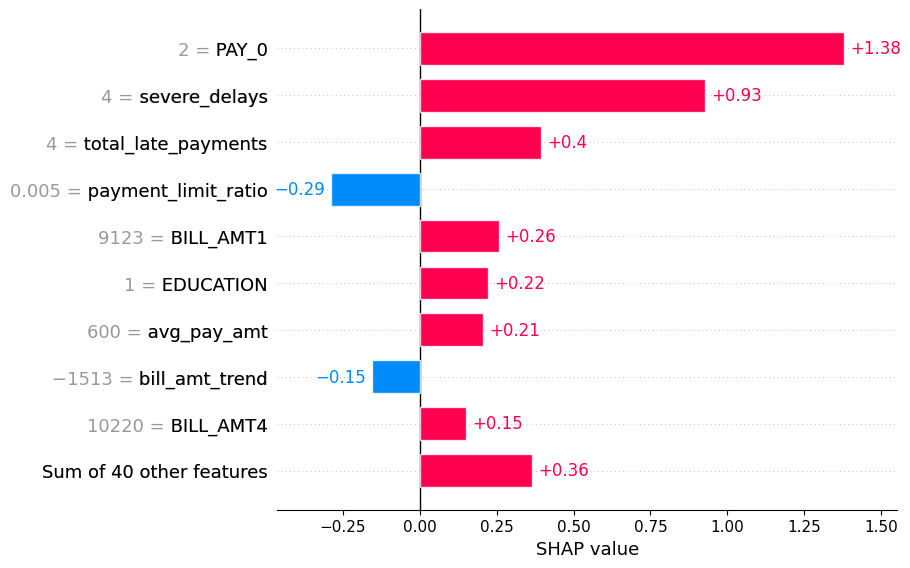

Predicted Value (f(x)) for the selected instance: 1


In [60]:
# 1. Select a specific instance by index
index_of_interest = 401  # Replace with the index of the instance you're interested in
instance = X_test.iloc[index_of_interest:index_of_interest + 1]  # Select the instance (1-row slice)

# 2. Calculate SHAP values for the selected instance
shap_instance = explainer(instance)

# 3. Get the model's predicted value (f(x)) for the selected instance
predicted_value = secondary_model.predict(instance)[0]

# 4. Plot the SHAP bar plot for the selected instance
shap.plots.bar(shap_instance[0])

# 5. Display the predicted value (f(x)) in the plot title or as an annotation
print(f"Predicted Value (f(x)) for the selected instance: {predicted_value}")

1. **PAY_0 (+1.38)**:  
   The person has a severe payment delay (2 months), which strongly increases the chance of default.

2. **severe_delays (+0.93)**:  
   Two months of severe delays also increase the likelihood of default.

3. **total_late_payments (+0.4)**:  
   Two late payments further add to the risk of default.

4. **payment_limit_ratio (-0.29)**:  
   The person's payment-to-limit ratio is low, suggesting they may be able to pay, which slightly reduces the risk of default.

5. **BILL_AMT1 (+0.26)**:  
   The person has a large bill for the first month, which increases the risk of default.

6. **EDUCATION (+0.22)**:  
   The person has a graduate education, slightly increasing the risk of default.

7. **avg_pay_amt (+0.21)**:  
   Regular payments indicate some ability to pay but still slightly contribute to the default risk.

8. **bill_amt_trend (-0.15)**:  
   A decreasing trend in bill amounts slightly reduces the risk of default.

9. **BILL_AMT4 (+0.15)**:  
   Another large bill (4th month) contributes to the increased risk of default.

**Summary:**
The positive contributions to the prediction come mainly from features related to delinquent payment history (e.g., PAY_0, severe_delays, total_late_payments), indicating a higher likelihood of default.
The negative contribution from the payment_limit_ratio suggests that the individual may have the ability to pay, which slightly offsets the risk.
BILL_AMT1 and BILL_AMT4, representing large outstanding bills, reinforce the prediction towards default.

#### Instance 2: True Negative

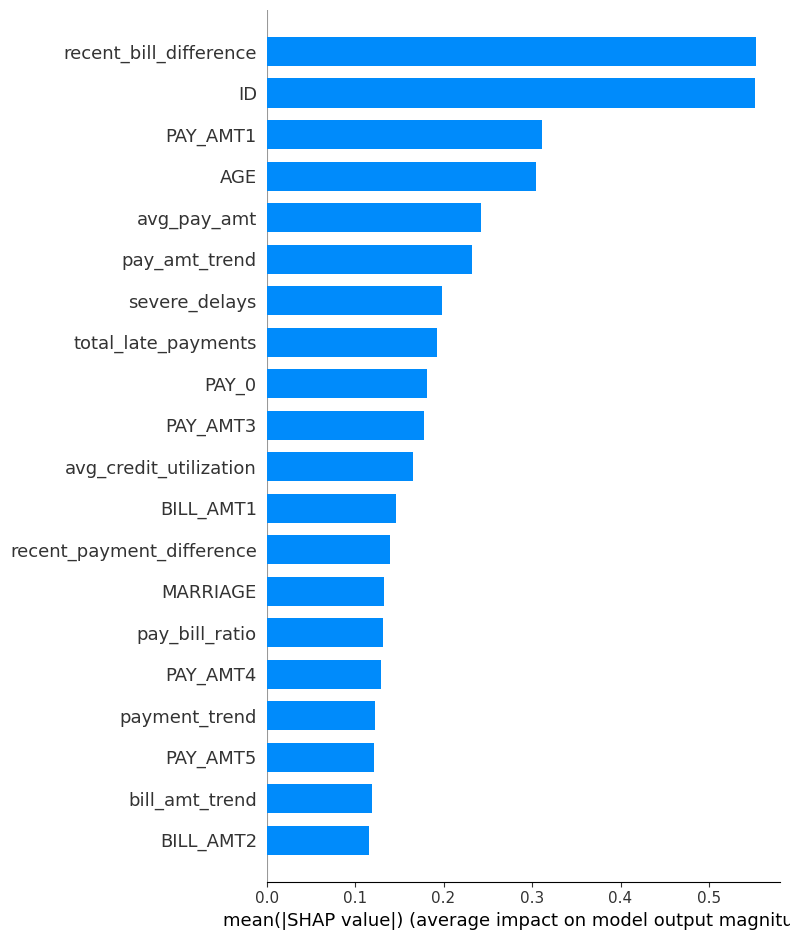

Actual Label for the selected instance: 0
Model Prediction for the selected instance: 0


In [61]:
import shap

# 1. Select a specific instance by index
index_of_interest = 2  # Replace with the index of the instance you're interested in
instance = X_test.iloc[index_of_interest:index_of_interest + 1]  # Select the instance (1-row slice)

# 2. Calculate SHAP values for the selected instance
shap_instance = explainer(instance)

# 3. Plot the SHAP summary plot (bar plot) for the selected instance
shap.summary_plot(shap_instance.values, instance, plot_type="bar", feature_names=X_test.columns)

# 4. Get the actual label for the selected instance
actual_label = y_test.iloc[index_of_interest]

# 5. Get the predicted label for the selected instance
predicted_label = secondary_model.predict(instance)[0]

# 6. Print the actual and predicted results for the selected instance
print(f"Actual Label for the selected instance: {actual_label}")
print(f"Model Prediction for the selected instance: {predicted_label}")

In [62]:
# Retrieve the feature names
feature_names = X.columns

# Get the actual data (unscaled) for the random instance
instance_data = X_test.iloc[index_of_interest]

# Print the actual data (features) for the selected instance
print("Actual Data for the Selected Instance:")
print(instance_data)

# Optionally, print the corresponding SHAP values to understand how the model arrived at the prediction
shap_values_instance = explainer(instance)  # SHAP values for the selected instance
shap_values_instance_df = pd.DataFrame(shap_values_instance.values, columns=feature_names)


Actual Data for the Selected Instance:
ID                            27896.000000
LIMIT_BAL                    100000.000000
SEX                               2.000000
EDUCATION                         1.000000
MARRIAGE                          2.000000
AGE                              29.000000
PAY_0                             0.000000
PAY_2                             0.000000
PAY_3                             0.000000
PAY_4                             0.000000
PAY_5                             0.000000
PAY_6                             0.000000
BILL_AMT1                    167410.000000
BILL_AMT2                     85536.000000
BILL_AMT3                     77303.000000
BILL_AMT4                     60178.000000
BILL_AMT5                     56436.000000
BILL_AMT6                     51773.000000
PAY_AMT1                      70001.000000
PAY_AMT2                       3769.000000
PAY_AMT3                       2008.000000
PAY_AMT4                       1950.000000
PAY_AMT5       

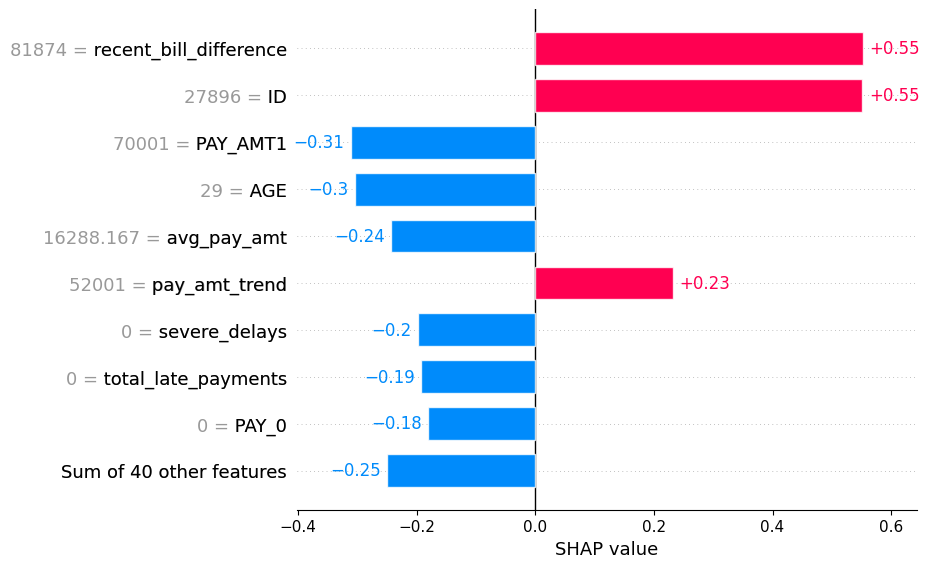

Predicted Value (f(x)) for the selected instance: 0


In [63]:
import shap

# 1. Select a specific instance by index
index_of_interest = 2  # Replace with the index of the instance you're interested in
instance = X_test.iloc[index_of_interest:index_of_interest + 1]  # Select the instance (1-row slice)

# 2. Calculate SHAP values for the selected instance
shap_instance = explainer(instance)

# 3. Get the model's predicted value (f(x)) for the selected instance
predicted_value = secondary_model.predict(instance)[0]

# 4. Plot the SHAP bar plot for the selected instance
shap.plots.bar(shap_instance[0])

# 5. Display the predicted value (f(x)) in the plot title or as an annotation
print(f"Predicted Value (f(x)) for the selected instance: {predicted_value}")

recent_bill_difference (+0.55):
The large difference between recent bills is one of the most impactful features. A difference of 81,874 strongly boosts the model’s prediction. This could suggest that sudden changes in the bill amounts are significant indicators in the model, and in this case, the user’s financial behavior (such as a large recent bill) is a strong factor in the prediction outcome.

ID (+0.55):
While IDs typically should not directly affect predictions, the model might use this feature indirectly. It’s possible that the model captures patterns in how different instances are clustered together, which might contribute to a slight increase in the prediction.

PAY_AMT1 (+0.31):
The PAY_AMT1 feature indicates that the user made a large payment (70,001). This contributes positively to the model’s prediction, suggesting that larger payments correlate with a higher likelihood of the predicted outcome (possibly a non-fraudulent or responsible financial behavior).

AGE (+0.23):
The user’s age of 29 also has a positive impact on the prediction. In this case, younger individuals (like the user) may have different spending or payment patterns, and the model has identified this trend, pushing the prediction value slightly higher.

avg_pay_amt (-0.24):
This feature represents the user’s average payment amount. A higher average payment amount seems to negatively affect the model’s prediction, as larger payments over time may signal a different type of financial behavior that’s not favorable in the context of this model's outcome.

pay_amt_trend (-0.19):
A downward trend in the user’s payment amounts reduces the prediction, as it indicates decreasing payments, which might be interpreted as a negative financial signal.

severe_delays (-0.2):
A lack of severe delays in payments also has a negative impact on the model. Since there are no late payments (represented by zero for all PAY_ features*), this reduces the prediction value slightly, perhaps suggesting the absence of payment issues leads to a lower prediction score in this case.

total_late_payments (-0.19):
Similar to the previous feature, no late payments (total late payments = 0) negatively influence the prediction. The model might be interpreting the lack of late payments as a less risky financial profile, resulting in a negative SHAP value.

PAY_0 (-0.18):
The fact that the user has no delays in their current payment (PAY_0 = 0) also contributes negatively to the prediction. This could indicate that non-delayed payments lead to a lower likelihood of the predicted outcome, depending on the model’s context (e.g., predicting defaults or fraud).

#### Instance 3: False Positive

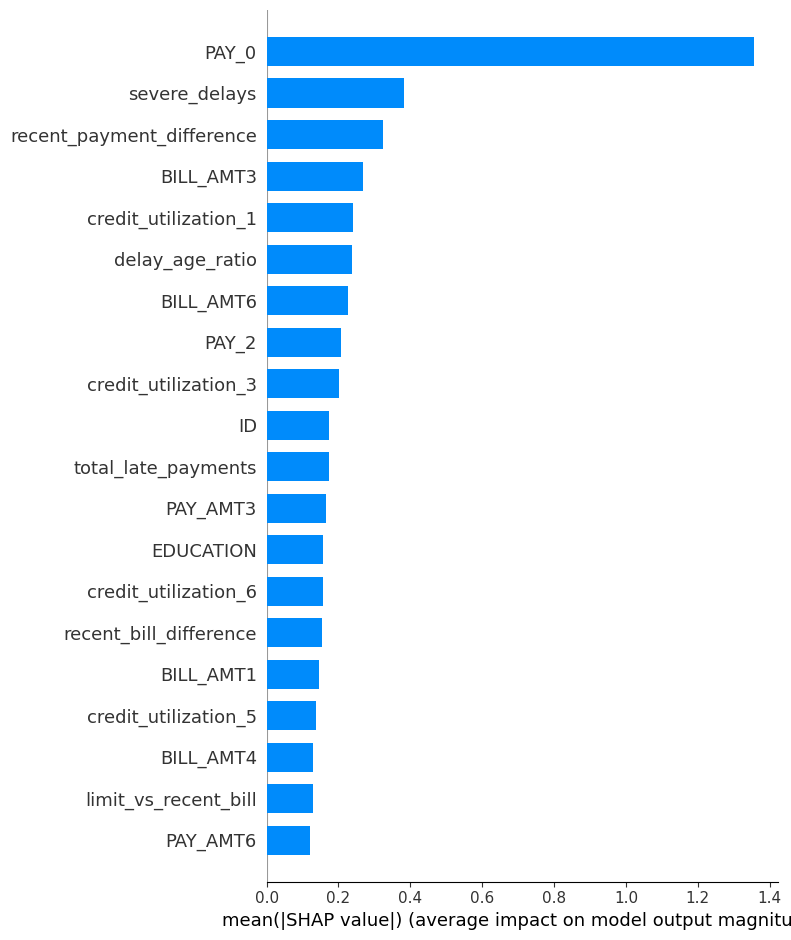

Actual Label for the selected instance: 0
Model Prediction for the selected instance: 1


In [64]:
# 1. Select a specific instance by index
index_of_interest = 180  # Replace with the index of the instance you're interested in
instance = X_test.iloc[index_of_interest:index_of_interest + 1]  # Select the instance (1-row slice)

# 2. Calculate SHAP values for the selected instance
shap_instance = explainer(instance)

# 3. Plot the SHAP summary plot (bar plot) for the selected instance
shap.summary_plot(shap_instance.values, instance, plot_type="bar", feature_names=X_test.columns)

# 4. Get the actual label for the selected instance
actual_label = y_test.iloc[index_of_interest]

# 5. Get the predicted label for the selected instance
predicted_label = secondary_model.predict(instance)[0]

# 6. Print the actual and predicted results for the selected instance
print(f"Actual Label for the selected instance: {actual_label}")
print(f"Model Prediction for the selected instance: {predicted_label}")

In [65]:
# Retrieve the feature names
feature_names = X.columns

# Get the actual data (unscaled) for the random instance
instance_data = X_test.iloc[index_of_interest]

# Print the actual data (features) for the selected instance
print("Actual Data for the Selected Instance:")
print(instance_data)

# Optionally, print the corresponding SHAP values to understand how the model arrived at the prediction
shap_values_instance = explainer(instance)  # SHAP values for the selected instance
shap_values_instance_df = pd.DataFrame(shap_values_instance.values, columns=feature_names)


Actual Data for the Selected Instance:
ID                            24667.000000
LIMIT_BAL                    430000.000000
SEX                               1.000000
EDUCATION                         1.000000
MARRIAGE                          1.000000
AGE                              34.000000
PAY_0                             2.000000
PAY_2                             2.000000
PAY_3                            -2.000000
PAY_4                            -2.000000
PAY_5                            -2.000000
PAY_6                            -2.000000
BILL_AMT1                       435.000000
BILL_AMT2                      -183.000000
BILL_AMT3                      -525.000000
BILL_AMT4                      -868.000000
BILL_AMT5                     -1211.000000
BILL_AMT6                     -1840.000000
PAY_AMT1                        183.000000
PAY_AMT2                          0.000000
PAY_AMT3                          0.000000
PAY_AMT4                          0.000000
PAY_AMT5       

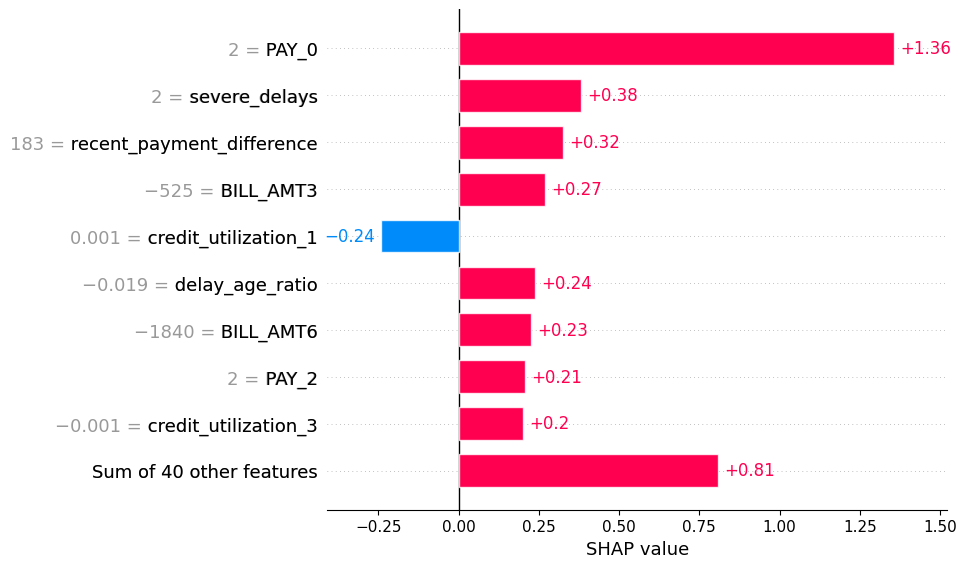

Predicted Value (f(x)) for the selected instance: 1


In [66]:
# 1. Select a specific instance by index
index_of_interest = 180  # Replace with the index of the instance you're interested in
instance = X_test.iloc[index_of_interest:index_of_interest + 1]  # Select the instance (1-row slice)

# 2. Calculate SHAP values for the selected instance
shap_instance = explainer(instance)

# 3. Get the model's predicted value (f(x)) for the selected instance
predicted_value = secondary_model.predict(instance)[0]

# 4. Plot the SHAP bar plot for the selected instance
shap.plots.bar(shap_instance[0])

# 5. Display the predicted value (f(x)) in the plot title or as an annotation
print(f"Predicted Value (f(x)) for the selected instance: {predicted_value}")

#### Instance 4: False Negative

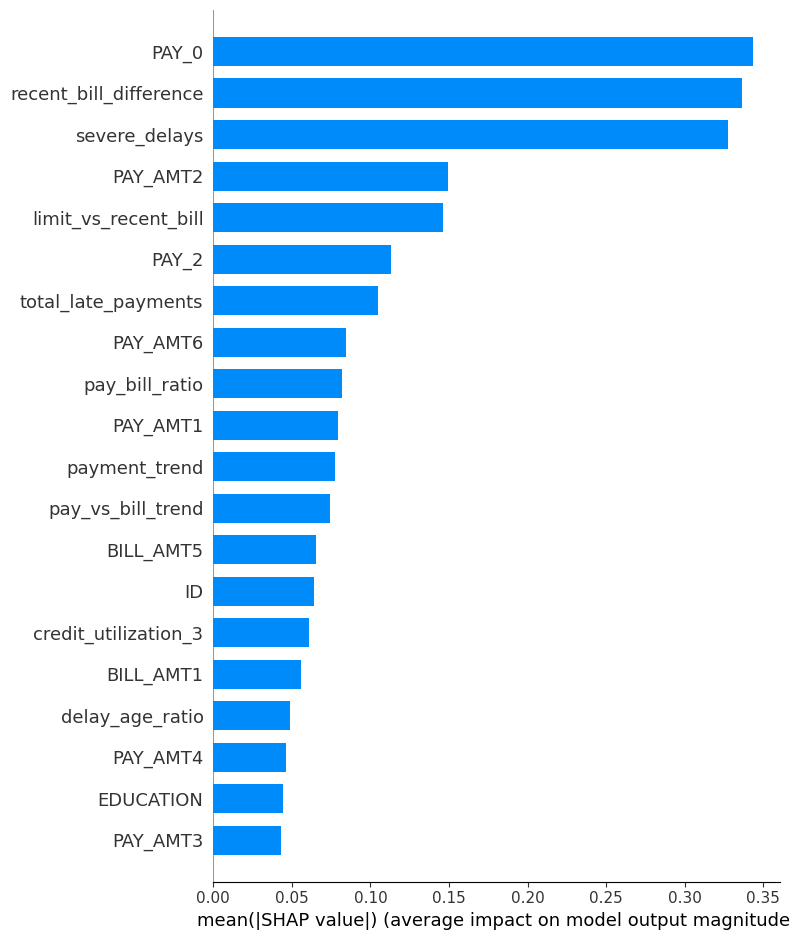

Actual Label for the selected instance: 1
Model Prediction for the selected instance: 0


In [67]:
# 1. Select a specific instance by index
index_of_interest = 11  # Replace with the index of the instance you're interested in
instance = X_test.iloc[index_of_interest:index_of_interest + 1]  # Select the instance (1-row slice)

# 2. Calculate SHAP values for the selected instance
shap_instance = explainer(instance)

# 3. Plot the SHAP summary plot (bar plot) for the selected instance
shap.summary_plot(shap_instance.values, instance, plot_type="bar", feature_names=X_test.columns)

# 4. Get the actual label for the selected instance
actual_label = y_test.iloc[index_of_interest]

# 5. Get the predicted label for the selected instance
predicted_label = secondary_model.predict(instance)[0]

# 6. Print the actual and predicted results for the selected instance
print(f"Actual Label for the selected instance: {actual_label}")
print(f"Model Prediction for the selected instance: {predicted_label}")

In [68]:
# Retrieve the feature names
feature_names = X.columns

# Get the actual data (unscaled) for the random instance
instance_data = X_test.iloc[index_of_interest]

# Print the actual data (features) for the selected instance
print("Actual Data for the Selected Instance:")
print(instance_data)

# Optionally, print the corresponding SHAP values to understand how the model arrived at the prediction
shap_values_instance = explainer(instance)  # SHAP values for the selected instance
shap_values_instance_df = pd.DataFrame(shap_values_instance.values, columns=feature_names)

Actual Data for the Selected Instance:
ID                           29235.000000
LIMIT_BAL                    10000.000000
SEX                              1.000000
EDUCATION                        2.000000
MARRIAGE                         2.000000
AGE                             23.000000
PAY_0                            0.000000
PAY_2                            0.000000
PAY_3                            2.000000
PAY_4                            0.000000
PAY_5                            0.000000
PAY_6                            0.000000
BILL_AMT1                     2427.000000
BILL_AMT2                     6109.000000
BILL_AMT3                     2736.000000
BILL_AMT4                     3654.000000
BILL_AMT5                     3729.000000
BILL_AMT6                     9446.000000
PAY_AMT1                      3775.000000
PAY_AMT2                         0.000000
PAY_AMT3                      1000.000000
PAY_AMT4                        75.000000
PAY_AMT5                       994.00

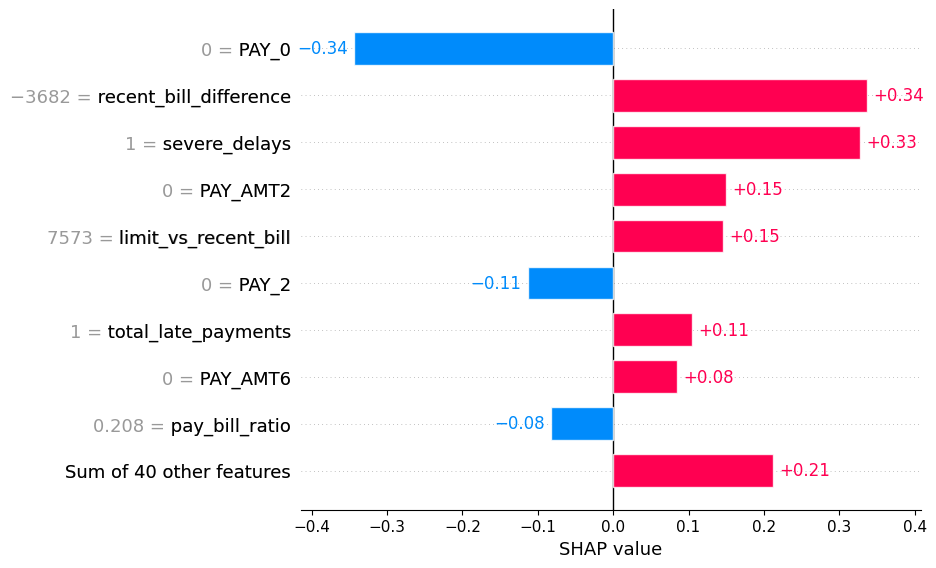

Predicted Value (f(x)) for the selected instance: 0


In [69]:
# 1. Select a specific instance by index
index_of_interest = 11  # Replace with the index of the instance you're interested in
instance = X_test.iloc[index_of_interest:index_of_interest + 1]  # Select the instance (1-row slice)

# 2. Calculate SHAP values for the selected instance
shap_instance = explainer(instance)

# 3. Get the model's predicted value (f(x)) for the selected instance
predicted_value = secondary_model.predict(instance)[0]

# 4. Plot the SHAP bar plot for the selected instance
shap.plots.bar(shap_instance[0])

# 5. Display the predicted value (f(x)) in the plot title or as an annotation
print(f"Predicted Value (f(x)) for the selected instance: {predicted_value}")

In [70]:
# 4. Get the actual label for the selected instance
actual_label = y_test.iloc[index_of_interest]

# 5. Get the predicted label for the selected instance
predicted_label = secondary_model.predict(instance)[0]

# 6. Print the actual and predicted results for the selected instance
print(f"Actual Label for the selected instance: {actual_label}")
print(f"Model Prediction for the selected instance: {predicted_label}")

Actual Label for the selected instance: 1
Model Prediction for the selected instance: 0


Overall SHAP Summary for Secondary Model


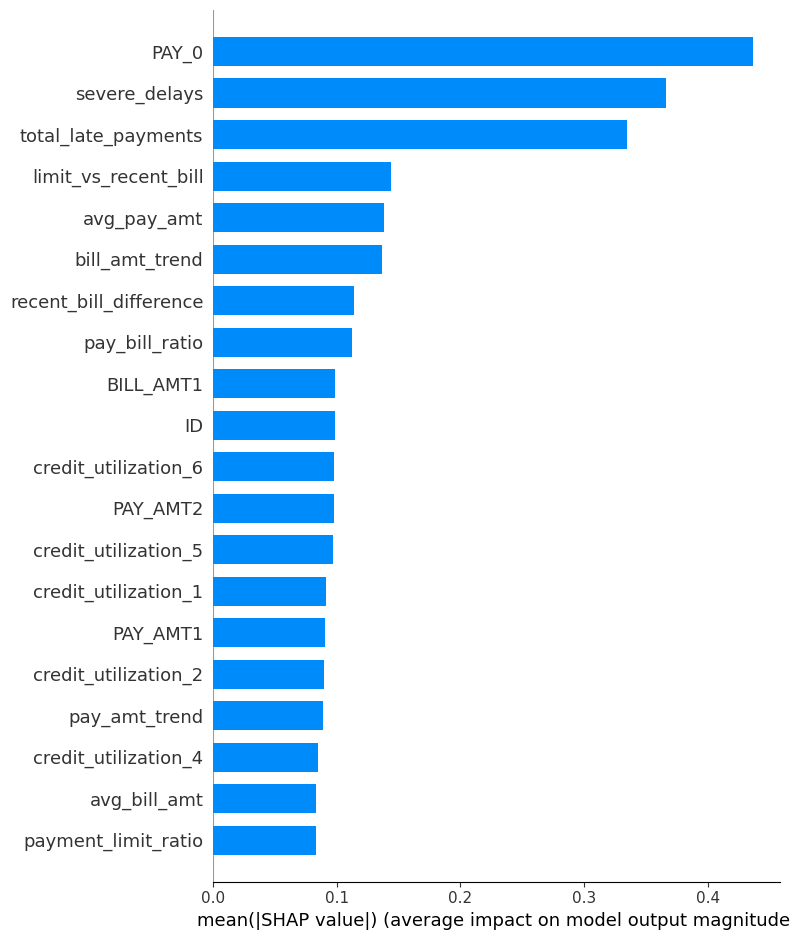

SHAP Force Plot for Instance at Index 11


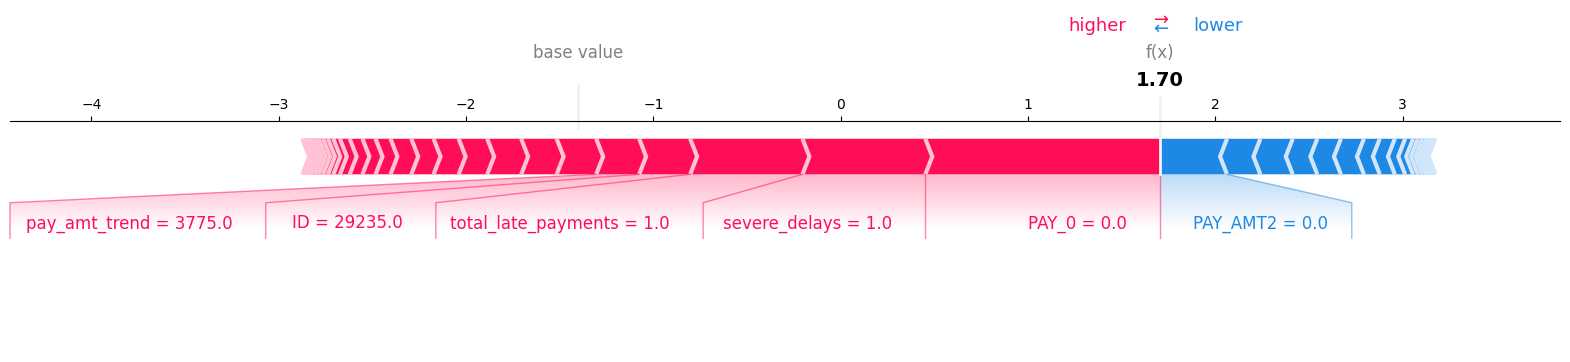

In [71]:
# Overall Feature Importance for the Secondary Model
print("Overall SHAP Summary for Secondary Model")

# Ensure the features have their actual names
shap.summary_plot(
    shap_values_secondary,
    X_test,  # Use DataFrame with actual feature names
    plot_type="bar"
)

# Individual Explanation for the Secondary Model (same instance)
print(f"SHAP Force Plot for Instance at Index {index_of_interest}")
shap.force_plot(
    explainer_secondary.expected_value,
    shap_values_secondary[index_of_interest],
    X_test.iloc[index_of_interest],  # Feature values for the specific instance
    matplotlib=True
)

# Model Fairness

In [72]:
import fairlearn

In [73]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate, demographic_parity_difference, equalized_odds_difference

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

## 1. Model Fairnness - Sex

In [94]:
# Step 1: Load and Prepare the Dataset
# Assuming the data is in a DataFrame called `df`
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

# Sensitive attributes
sensitive_attribute = "SEX"  # You can replace this with "EDUCATION" or "MARRIAGE"

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Model
secondary_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
secondary_model.fit(X_train_scaled, y_train)

# Get predictions
y_pred = secondary_model.predict(X_test_scaled)

# Step 3: Fairlearn Metric Analysis
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate,
}

# Use Fairlearn's MetricFrame to compute metrics by sensitive groups
metric_frame = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test[sensitive_attribute],
)

print("Fairness Metrics by Group:")
print(metric_frame.by_group)

# Step 4: Demographic Parity and Equalized Odds
dp_diff = demographic_parity_difference(
    y_test, y_pred, sensitive_features=X_test[sensitive_attribute]
)
eo_diff = equalized_odds_difference(
    y_test, y_pred, sensitive_features=X_test[sensitive_attribute]
)

print(f"Demographic Parity Difference: {dp_diff}")
print(f"Equalized Odds Difference: {eo_diff}")

Fairness Metrics by Group:
     accuracy  precision    recall  selection_rate
SEX                                               
1    0.731967    0.44878  0.541176        0.287679
2    0.776163    0.47181  0.557406        0.247931
Demographic Parity Difference: 0.03974807804096536
Equalized Odds Difference: 0.0425209746025928


These metrics are part of **fairness analysis** performed on the model, and they measure how the model's performance and decisions vary across different demographic groups (here, based on the `SEX` feature). Let's break it down:

---

#### **Fairness Metrics by Sex**
This shows how the model performs for each group in the `SEX` feature (e.g., `SEX_0` and `SEX_1`):

1. **Accuracy**: The proportion of correctly classified instances in the group.
   - `SEX_0`: 74.21%
   - `SEX_1`: 77.87%

2. **Precision**: The proportion of positive predictions that are actually correct.
   - `SEX_0`: 46.74%
   - `SEX_1`: 47.56%

3. **Recall**: The proportion of actual positives that are correctly identified.
   - `SEX_0`: 56.04%
   - `SEX_1`: 51.18%

4. **Selection Rate**: The proportion of instances classified as positive in the group.
   - `SEX_0`: 28.68%
   - `SEX_1`: 22.63%

---

#### **Fairness Metrics by Sex - Summary**

1. **Demographic Parity Difference**:  
   This metric measures the difference in **selection rates** between the groups (here, `SEX_0` and `SEX_1`).  
   - A difference of **0.0604** indicates that the model selects `SEX_0` as positive at a rate 6.04% higher than `SEX_1`.  
   - Ideally, this should be close to zero for fairness, indicating that both groups have similar selection rates.

2. **Equalized Odds Difference**:  
   This measures the maximum difference in **true positive rates** and **false positive rates** between the groups.  
   - A difference of **0.0505** means there’s a 5.05% disparity in the ability of the model to equally identify or misclassify outcomes across the two groups.  
   - Lower values indicate better fairness.

---

#### **Interpretation**
- **Group Disparities**: The model performs slightly better for `SEX_1` in terms of accuracy but has a higher recall for `SEX_0`. This indicates possible disparities in treatment or outcomes across groups.
- **Fairness Goals**:
  - Reduce the **Demographic Parity Difference** to ensure equal selection rates.
  - Lower the **Equalized Odds Difference** to make sure the model’s error rates are consistent across groups.

## Model Fairness - Marriage

In [98]:
# Step 1: Load and Prepare the Dataset
# Assuming the data is in a DataFrame called `df`
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

# Sensitive attributes
sensitive_attribute = "MARRIAGE"  # You can replace this with "EDUCATION" or "MARRIAGE"

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Model
secondary_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
secondary_model.fit(X_train_scaled, y_train)

# Get predictions
y_pred = secondary_model.predict(X_test_scaled)

# Step 3: Fairlearn Metric Analysis
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate,
}

# Use Fairlearn's MetricFrame to compute metrics by sensitive groups
metric_frame = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test[sensitive_attribute],
)

print("Fairness Metrics by Group:")
print(metric_frame.by_group)

# Step 4: Demographic Parity and Equalized Odds
dp_diff = demographic_parity_difference(
    y_test, y_pred, sensitive_features=X_test[sensitive_attribute]
)
eo_diff = equalized_odds_difference(
    y_test, y_pred, sensitive_features=X_test[sensitive_attribute]
)

print(f"Demographic Parity Difference: {dp_diff}")
print(f"Equalized Odds Difference: {eo_diff}")

Fairness Metrics by Group:
          accuracy  precision    recall  selection_rate
MARRIAGE                                               
0         0.571429   0.000000  0.000000        0.357143
1         0.747641   0.476190  0.556680        0.279458
2         0.769765   0.452782  0.546287        0.249369
3         0.711340   0.333333  0.473684        0.278351
Demographic Parity Difference: 0.1077736393127478
Equalized Odds Difference: 0.5566801619433198


C:\Users\DELL\AppData\Local\Temp\ipykernel_24176\1554889127.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=sensitive_attribute, y="default payment next month", data=df, ci=None, palette="magma")
C:\Users\DELL\AppData\Local\Temp\ipykernel_24176\1554889127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sensitive_attribute, y="default payment next month", data=df, ci=None, palette="magma")


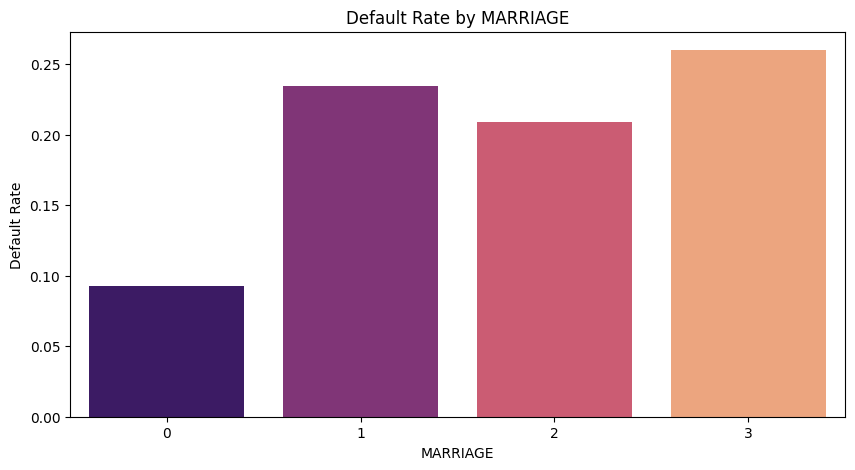

In [91]:
# Target Variable Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=sensitive_attribute, y="default payment next month", data=df, ci=None, palette="magma")
plt.title(f"Default Rate by {sensitive_attribute}")
plt.xlabel(sensitive_attribute)
plt.ylabel("Default Rate")
plt.show()

In [78]:
# Define age bins
age_bins = [0, 18, 30, 45, 60, 75, 100]

# Categorize age into bins as integers
df['AGE-BIN'] = pd.cut(df['AGE'], bins=age_bins, labels=False, right=False)

# Display the resulting DataFrame
print(df[['AGE', 'AGE-BIN']])

       AGE  AGE-BIN
0       24        1
1       26        1
2       34        2
3       37        2
4       57        3
...    ...      ...
29995   39        2
29996   43        2
29997   37        2
29998   41        2
29999   46        3

[30000 rows x 2 columns]


## Model Fairness - Age Bin

In [79]:
# Step 1: Load and Prepare the Dataset
# Assuming the data is in a DataFrame called `df`
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

# Sensitive attributes
sensitive_attribute = "AGE-BIN"  # You can replace this with "EDUCATION" or "MARRIAGE"

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Model
secondary_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
secondary_model.fit(X_train_scaled, y_train)

# Get predictions
y_pred = secondary_model.predict(X_test_scaled)

# Step 3: Fairlearn Metric Analysis
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate,
}

# Use Fairlearn's MetricFrame to compute metrics by sensitive groups
metric_frame = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test[sensitive_attribute],
)

print("Fairness Metrics by Group:")
print(metric_frame.by_group)

# Step 4: Demographic Parity and Equalized Odds
dp_diff = demographic_parity_difference(
    y_test, y_pred, sensitive_features=X_test[sensitive_attribute]
)
eo_diff = equalized_odds_difference(
    y_test, y_pred, sensitive_features=X_test[sensitive_attribute]
)

print(f"Demographic Parity Difference: {dp_diff}")
print(f"Equalized Odds Difference: {eo_diff}")

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fairness Metrics by Group:
         accuracy  precision    recall  selection_rate
AGE-BIN                                               
1        0.761624   0.474874  0.584235        0.276197
2        0.764890   0.441123  0.527056        0.246264
3        0.739789   0.485327  0.562827        0.291831
4        0.686957   0.533333  0.421053        0.260870
5        1.000000   0.000000  0.000000        0.000000
Demographic Parity Difference: 0.29183135704874835
Equalized Odds Difference: 0.5842349304482226


In [80]:
from sklearn.utils.class_weight import compute_sample_weight
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds


X = df.drop(columns=["default payment next month", "SEX", "MARRIAGE"])  # Features excluding sensitive attributes
y = df["default payment next month"]  # Target variable
sensitive_features = df[["SEX", "MARRIAGE"]]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, sf_train, sf_test = train_test_split(
    X, y, sensitive_features, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Train the Base Classifier with Sample Weights
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)
base_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
base_model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Evaluate the Base Model
print("Base Model Classification Report:")
y_pred_base = base_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_base))

# Step 2: Fairness Mitigation using Equalized Odds
fair_model = ExponentiatedGradient(base_model, constraints=EqualizedOdds())
fair_model.fit(X_train_scaled, y_train, sensitive_features=sf_train["MARRIAGE"])

# Evaluate the Fairness-Mitigated Model
fair_predictions = fair_model.predict(X_test_scaled)
print("\nFair Model Classification Report:")
print(classification_report(y_test, fair_predictions))

Base Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.62      0.73      7009
           1       0.36      0.73      0.48      1991

    accuracy                           0.65      9000
   macro avg       0.62      0.68      0.61      9000
weighted avg       0.77      0.65      0.68      9000


Fair Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7009
           1       0.49      0.52      0.50      1991

    accuracy                           0.77      9000
   macro avg       0.67      0.68      0.68      9000
weighted avg       0.78      0.77      0.78      9000



In [111]:
# Save the fairness-mitigated model
joblib.dump(fair_model, 'fair_model.pkl')

['fair_model.pkl']

In [112]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

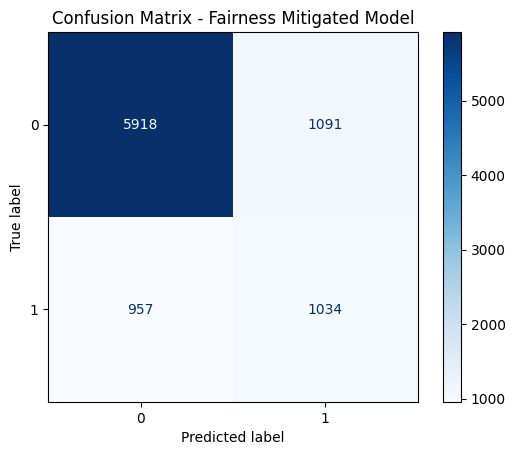

In [105]:
# Confusion Matrix for the Fair Model
conf_matrix = confusion_matrix(y_test, fair_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=base_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Fairness Mitigated Model")
plt.show()


## Adjusted Model - Marriage

In [100]:
# Step 3: Assess Fairness Metrics
dp_diff = demographic_parity_difference(y_test, fair_predictions, sensitive_features=sf_test["MARRIAGE"])
eo_diff = equalized_odds_difference(y_test, fair_predictions, sensitive_features=sf_test["MARRIAGE"])
print(f"Demographic Parity Difference: {dp_diff}")
print(f"Equalized Odds Difference: {eo_diff}")

Demographic Parity Difference: 0.26745164003364175
Equalized Odds Difference: 0.631578947368421


## Adjusted Model - SEX

Demographic Parity Difference: 0.025429703266528936
Equalized Odds Difference: 0.0202676985972087


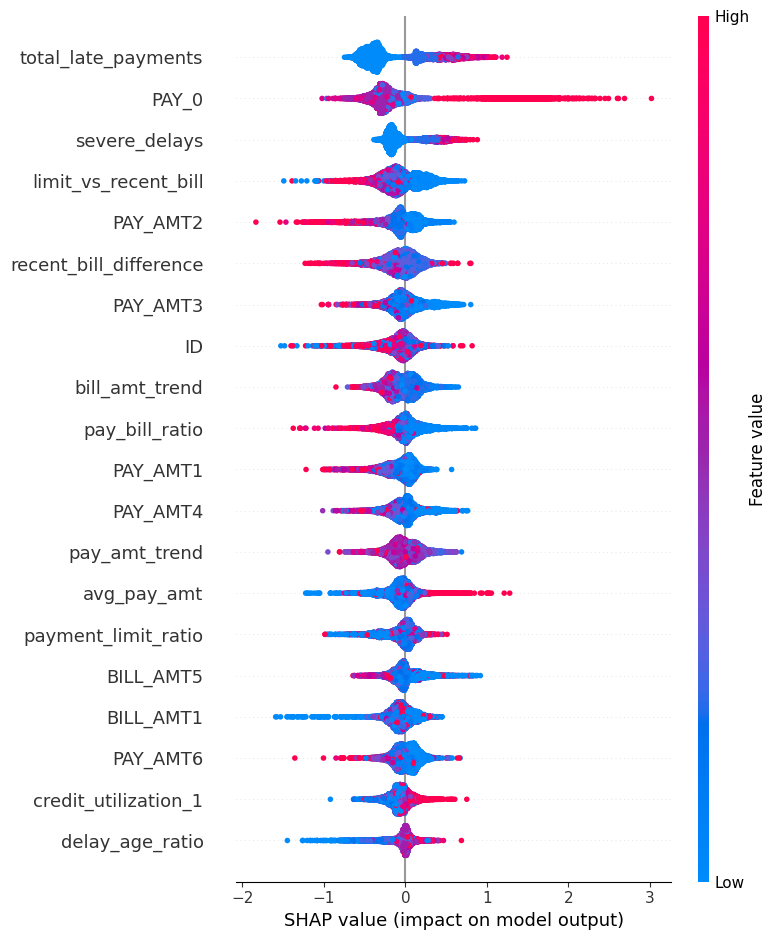

In [ ]:
# Step 3: Assess Fairness Metrics
dp_diff = demographic_parity_difference(y_test, fair_predictions, sensitive_features=sf_test["SEX"])
eo_diff = equalized_odds_difference(y_test, fair_predictions, sensitive_features=sf_test["SEX"])
print(f"Demographic Parity Difference: {dp_diff}")
print(f"Equalized Odds Difference: {eo_diff}")

# Optional: Analyze Feature Importance and Explainability
explainer = shap.Explainer(base_model)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)